TRYING TO TRAIN NETWORKS TO PREDICT MOMENT AND ROTATION GIVEN THE REAL LOAD FORCES (AFTER LPF). THE GOAL IS TO PLOT MOMENT X ROTATION AND ACCURATELY IDENTIFY THE MAXIMUM LOADS BEFORE THE FIRST AND LAST PLASTIC HINGES.

In [11]:
import numpy as np
import pandas as pd
from keras.models import load_model

SK_data = pd.read_excel('ROTATION2.xlsx')
SK_data=SK_data.dropna()


MOMENT_data = pd.read_excel('MOMENT2.xlsx')
MOMENT_data=MOMENT_data.dropna()


In [12]:
SK_data.iloc[3:10]

P1  P2  P3   L1     L2     L3       LPF      L1_real      L2_real  \
3   3   5   8  196  196.0   98.0  8.539482  1673.934495  1673.934495   
4   2   5  11  312  624.0  624.0  4.981011  1554.387554  3108.775108   
5   4   5  10  241  241.0  482.0  5.147266  1240.732085  1240.732085   
6   2   5   7   30   60.0   15.0  4.951170   148.565099   297.130198   
7   3   4   7  212  212.0  424.0  6.989592  1482.005520  1482.005520   
8   2   5  10  269  538.0  134.5  5.738104  1543.818940  3087.637880   
9   3   4   7  180   90.0   90.0  8.647566  1556.741852   778.370926   

       L3_real  ...       r15       r16       r17       r18       r19  \
3   836.967247  ...  0.000953 -0.000185 -0.000767 -0.001271 -0.001698   
4  3108.775108  ... -0.004334 -0.006169 -0.006953 -0.006684 -0.005364   
5  2481.464169  ... -0.015039 -0.015748 -0.015039 -0.012912 -0.008057   
6    74.282550  ... -0.002574 -0.004498 -0.005400 -0.005280 -0.004136   
7  2964.011040  ... -0.001220 -0.000758 -0.000351  0.000002  0.000301   
8   771.909470  ...  0.002212 -0.000587 -0.002630 -0.003930 -0.004488   
9   778.370926  ...  0.002843  0.001359  0.000050 -0.001084 -0.002045   

        r20       r21       r22       r23       r24  
3 -0.002047 -0.002319 -0.002513 -0.002629 -0.002668  
4 -0.002993  0.000510  0.006081  0.010358  0.011646  
5  0.013018  0.019561  0.023268  0.025395  0.026104  
6 -0.001970  0.000372  0.002045  0.003049  0.003384  
7  0.000546  0.000736  0.000872  0.000953  0.000980  
8 -0.004302 -0.003815 -0.003467 -0.003258 -0.003188  
9 -0.002830 -0.003441 -0.003877 -0.004139 -0.004227  

[7 rows x 35 columns]

In [13]:
SK_shape=SK_data.shape
SK_N=SK_shape[0]

MOMENT_shape=MOMENT_data.shape
MOMENT_N=MOMENT_shape[0]

def get_info(X,Ls,Y,N,data,loc,_real):
    
    
    for ii in range(0,N):
        q1 = int(data.iloc[ii,0])
        q2 = int(data.iloc[ii,1])
        q3 = int(data.iloc[ii,2])
        
        if _real:
            l1 = data.iloc[ii,7]
            l2 = data.iloc[ii,8]
            l3 = data.iloc[ii,9]
        
        else:
            l1 = data.iloc[ii,3]
            l2 = data.iloc[ii,4]
            l3 = data.iloc[ii,5]
            


        X[ii,q1,0] = 1
        X[ii,q2,0] = 1
        X[ii,q3,0] = 1

        Ls[ii,0,0]= l1*0.01
        Ls[ii,1,0]= l2*0.01
        Ls[ii,2,0]= l3*0.01

        Y[ii,:] = data.iloc[ii][loc]
        
        
        
SK_X = np.zeros((SK_N,13,1))
SK_Ls = np.zeros((SK_N,3,1))
SK_Y = np.zeros((SK_N,13))


MOMENT_X = np.zeros((MOMENT_N,13,1))
MOMENT_Ls = np.zeros((MOMENT_N,3,1))
MOMENT_Y = np.zeros((MOMENT_N,13))



ROT_loc =[10,12,14,16,18,20,22,24,26,28,30,32,34]
MOM_loc =[10,12,15,18,21,24,27,30,33,36,39,42,45]

xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12]


real=True
get_info(SK_X, SK_Ls, SK_Y, SK_N, SK_data,ROT_loc,real)
get_info(MOMENT_X, MOMENT_Ls, MOMENT_Y, MOMENT_N, MOMENT_data,MOM_loc,real)



In [14]:
'''
SK_l1_min = min(SK_data.iloc[:,7])
SK_l1_max = max(SK_data.iloc[:,7])
SK_l2_min = min(SK_data.iloc[:,8])
SK_l2_max = max(SK_data.iloc[:,8])
SK_l3_min = min(SK_data.iloc[:,9])
SK_l3_max = max(SK_data.iloc[:,9])
MOMENT_l1_min = min(MOMENT_data.iloc[:,7])
MOMENT_l1_max = max(MOMENT_data.iloc[:,7])
MOMENT_l2_min = min(MOMENT_data.iloc[:,8])
MOMENT_l2_max = max(MOMENT_data.iloc[:,8])
MOMENT_l3_min = min(MOMENT_data.iloc[:,9])
MOMENT_l3_max = max(MOMENT_data.iloc[:,9])

for ii in range(0,SK_N):
    SK_Ls[ii,0,0]= (SK_Ls[ii,0,0]-SK_l1_min) / (SK_l1_max-SK_l1_min)
    SK_Ls[ii,1,0]= (SK_Ls[ii,1,0]-SK_l2_min) / (SK_l2_max-SK_l2_min)
    SK_Ls[ii,2,0]= (SK_Ls[ii,2,0]-SK_l3_min) / (SK_l3_max-SK_l3_min)
        
for ii in range(0,MOMENT_N):
    MOMENT_Ls[ii,0,0]= (MOMENT_Ls[ii,0,0]-MOMENT_l1_min) / (MOMENT_l1_max-MOMENT_l1_min)
    MOMENT_Ls[ii,1,0]= (MOMENT_Ls[ii,1,0]-MOMENT_l2_min) / (MOMENT_l2_max-MOMENT_l2_min)
    MOMENT_Ls[ii,2,0]= (MOMENT_Ls[ii,2,0]-MOMENT_l3_min) / (MOMENT_l3_max-MOMENT_l3_min)
'''
print()

NEURAL NETWORKS TRAINING BOTH WITH SAME ARCHITECTURE, MSE, ADAM, 30 EPOCHS.

In [15]:
MOMENT_model=load_model('MOMENTmodel.h5')
SK_model=load_model('ROTATIONmodel.h5')


In [16]:
import matplotlib.pyplot as plt

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [ 6281.822401 12563.6448   12563.6448  ]


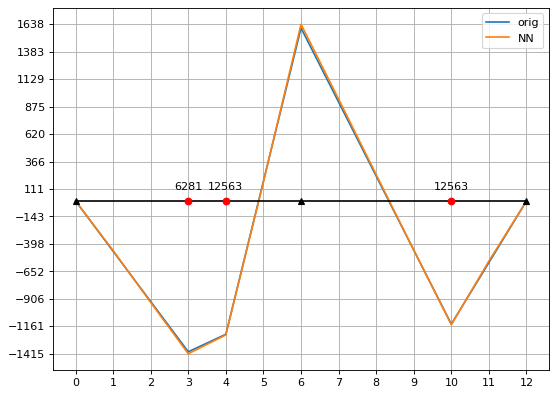

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [ 6289.438843 12578.87769   6289.438843]


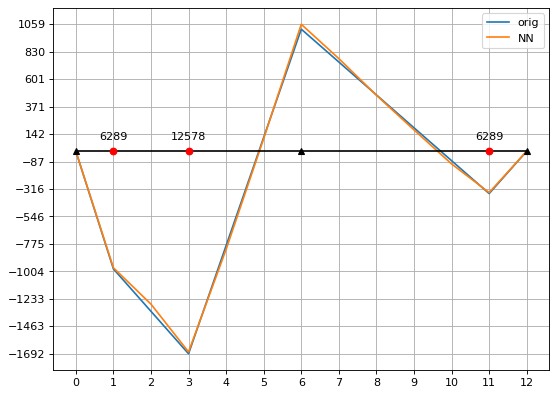

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [6290.263881 6290.263881 6290.263881]


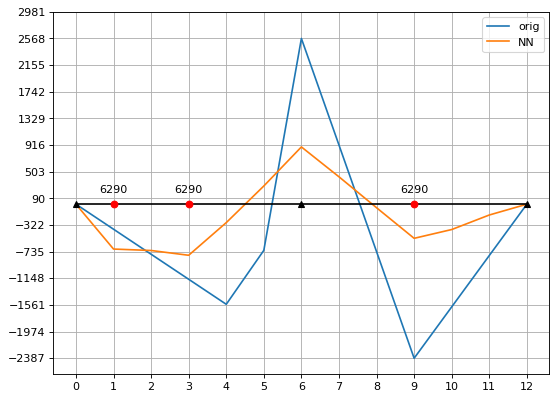

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [6290.263881 6290.263881 6290.263881]


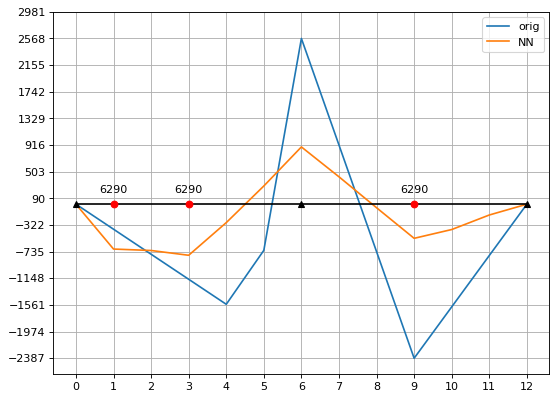

[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [ 6301.376659 12602.75332  12602.75332 ]


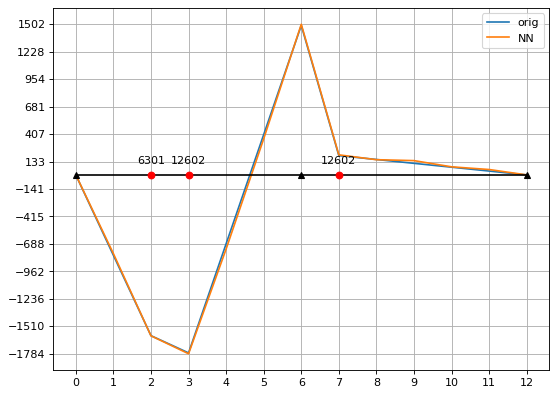

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.] [6302.377854 6302.377854 6302.377854]


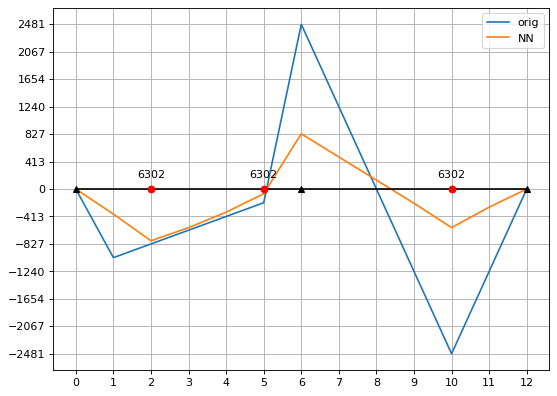

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [6303.964364 3151.982182 3151.982182]


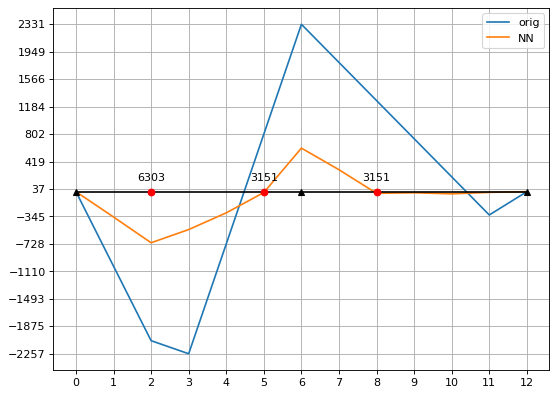

[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.] [ 6304.606518  6304.606518 12609.21304 ]


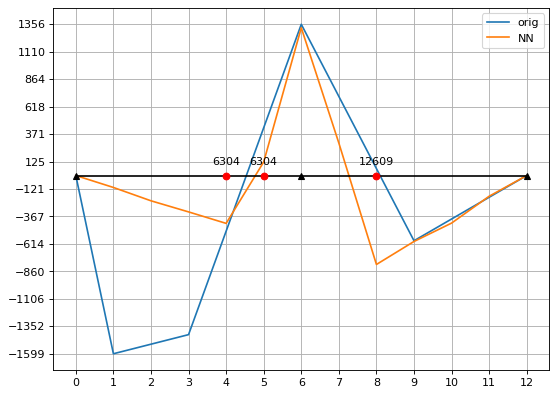

[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [ 6307.548809 12615.09762  12615.09762 ]


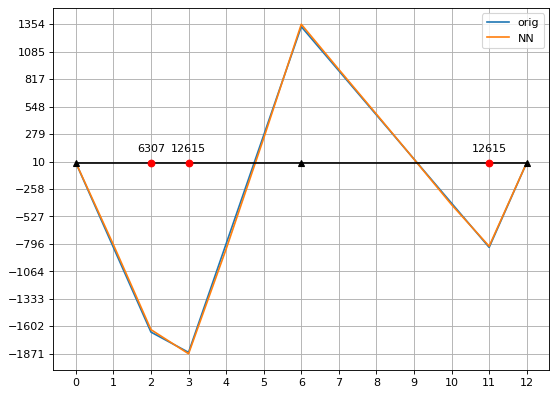

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [6319.987627 6319.987627 3159.993813]


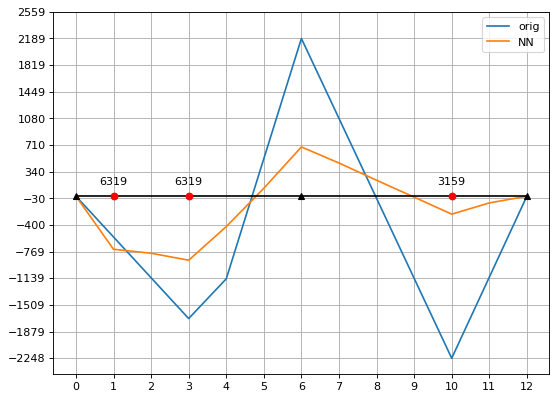

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [6319.987627 6319.987627 3159.993813]


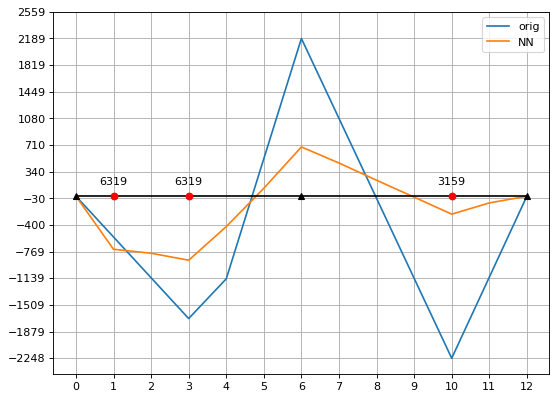

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [ 6323.186684 12646.37337   6323.186684]


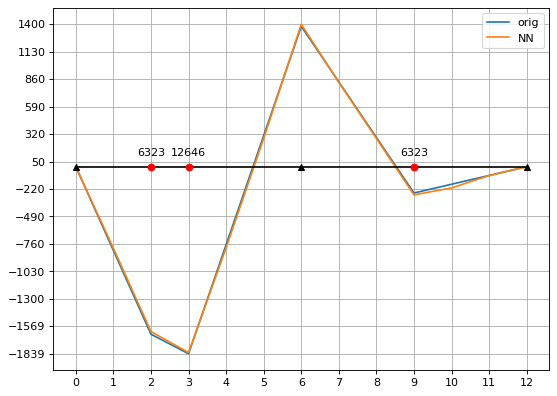

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [ 6327.834609 12655.66922  12655.66922 ]


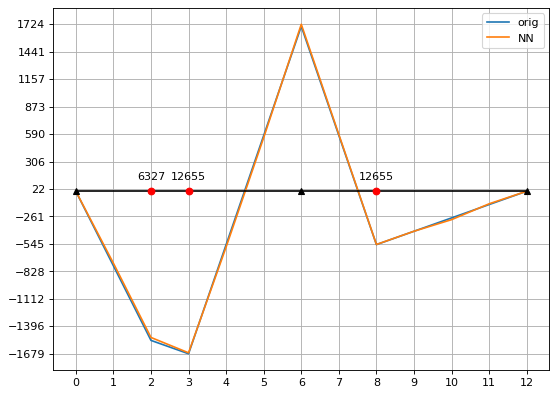

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [ 6328.083092 12656.16618   3164.041546]


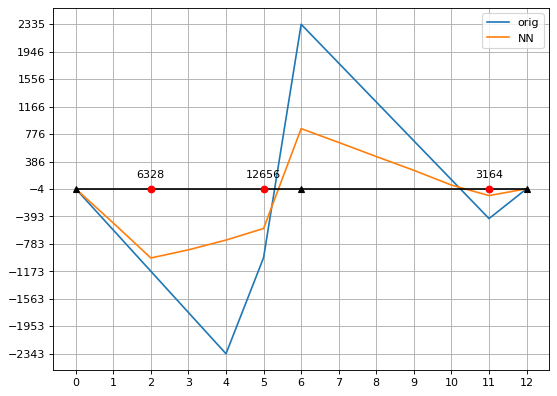

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [ 6328.083092 12656.16618   3164.041546]


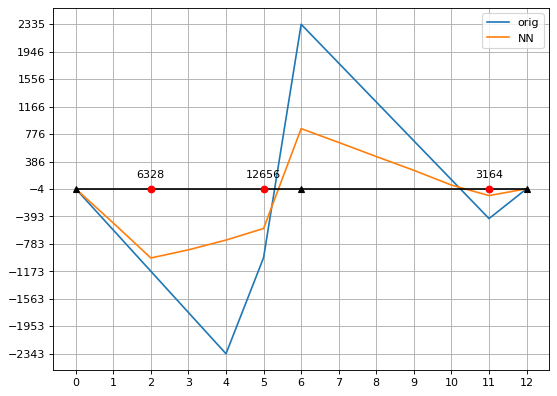

[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [ 6336.001066  3168.000533 12672.00213 ]


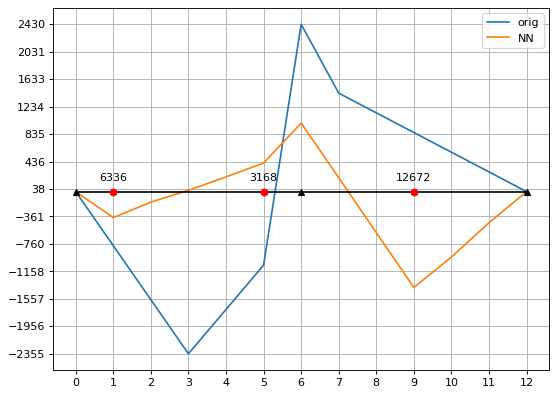

[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [ 6336.190016 12672.38003   3168.095008]


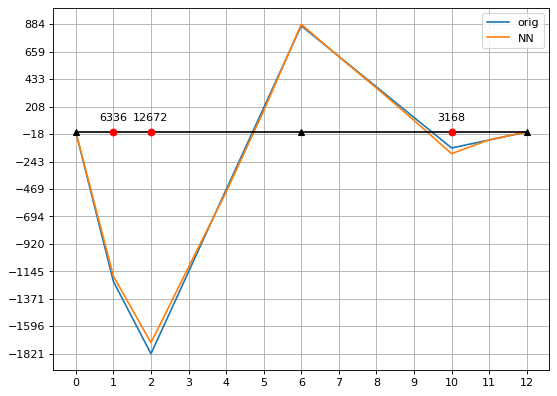

[0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [ 6341.020951 12682.0419    6341.020951]


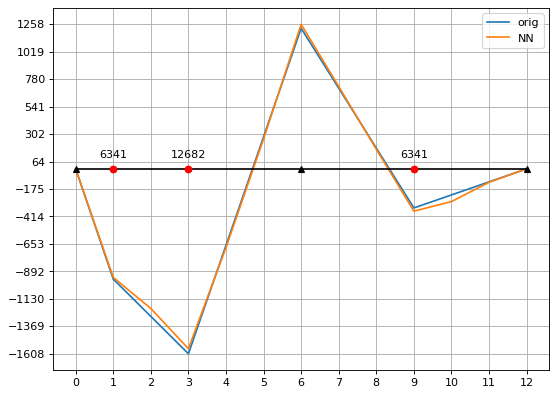

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [ 6342.098879 12684.19776   6342.098879]


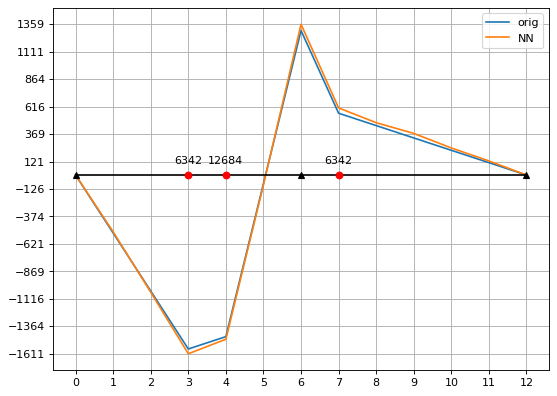

[0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] [ 6342.985546 12685.97109   3171.492773]


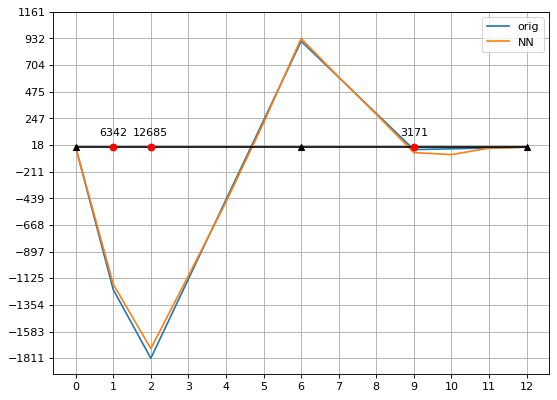

In [18]:
y_pred1 = MOMENT_model.predict([MOMENT_X,MOMENT_Ls[:,:,0]])
import time
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt



for ii in range(12000,12020):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(MOMENT_X[ii,:,0],MOMENT_Ls[ii,:,0]*1000)
    
    maximo = max([max(y_pred1[ii,:]),max(MOMENT_Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(MOMENT_Y[ii,:])])
        
    plt.plot(MOMENT_Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(MOMENT_X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(MOMENT_Ls[ii,i,0]*1000), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

GIVE OUT SOME PREDICTIONS INSIDE THE TRAINING DOMINIUM TO OBSERVE HOW WELL THE NETWORK IS PREDICTING.

[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.] [15086.7081135 30173.416227  15086.7081135]


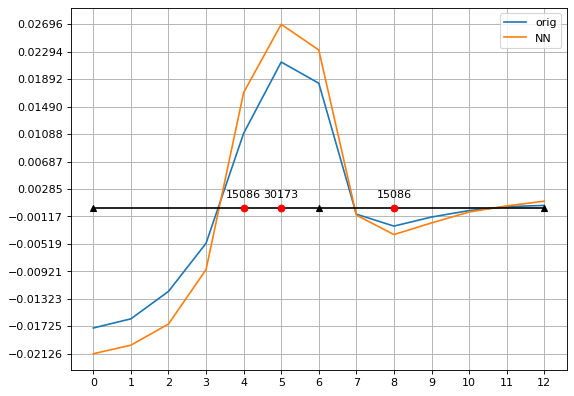

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.] [2855.6438187  1427.82190935 2855.6438187 ]


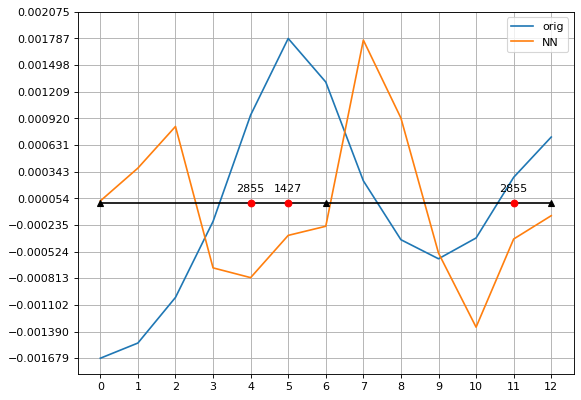

[0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [4093.08947347 4093.08947347 2046.54473674]


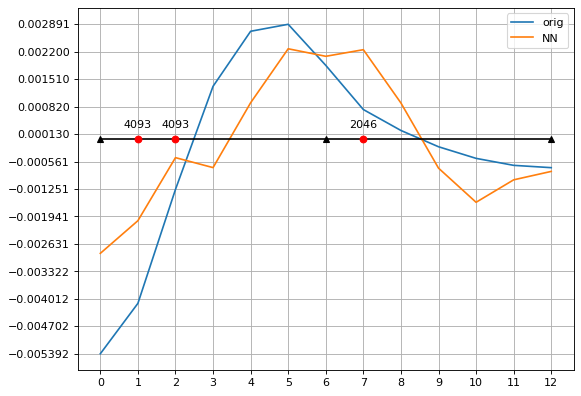

[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.] [16739.34494932 16739.34494932  8369.67247466]


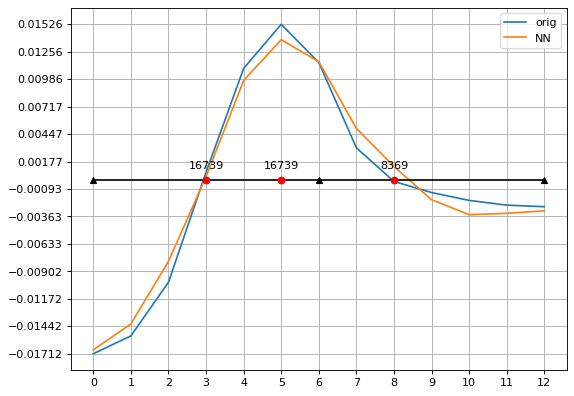

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.] [15543.87553992 31087.75107984 31087.75107984]


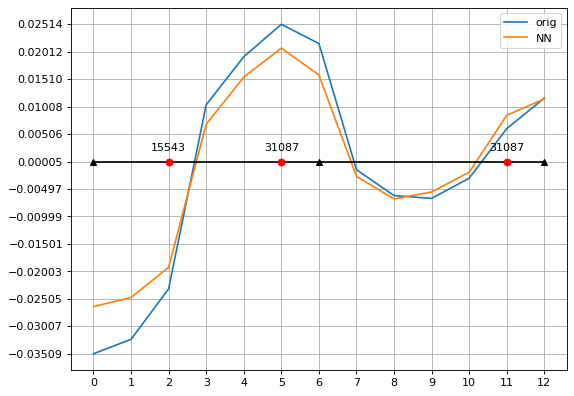

[0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.] [12407.32084551 12407.32084551 24814.64169102]


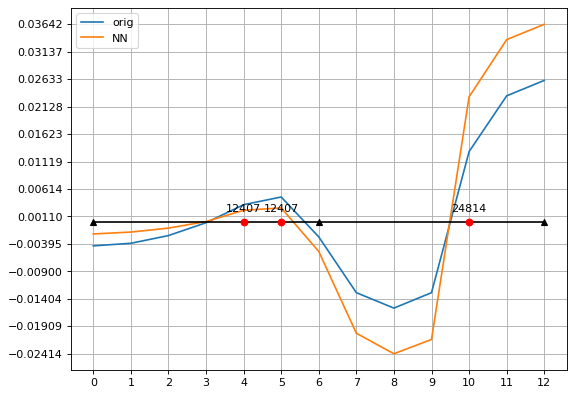

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.] [1485.6509904 2971.3019808  742.8254952]


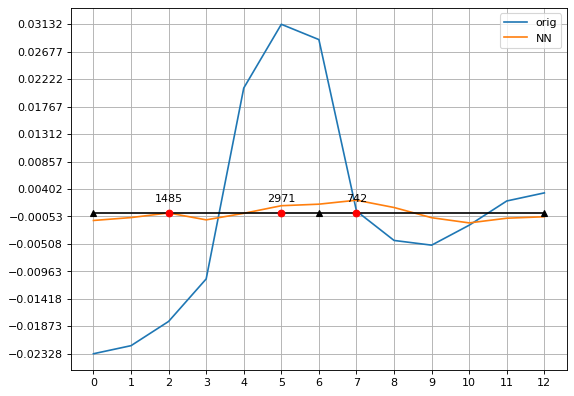

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [14820.055199 14820.055199 29640.110398]


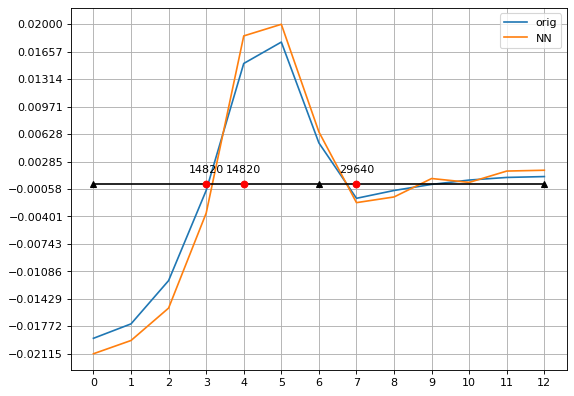

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.] [15438.18940223 30876.37880446  7719.09470112]


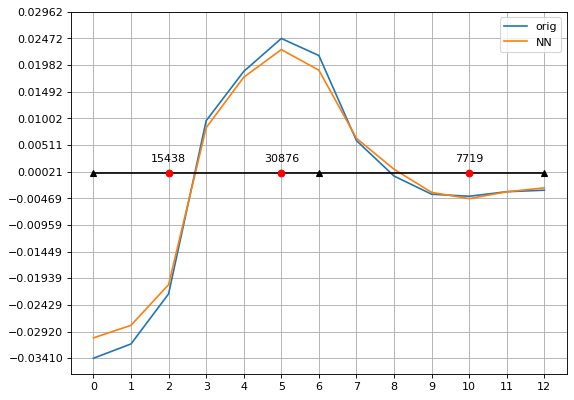

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [15567.4185156  7783.7092578  7783.7092578]


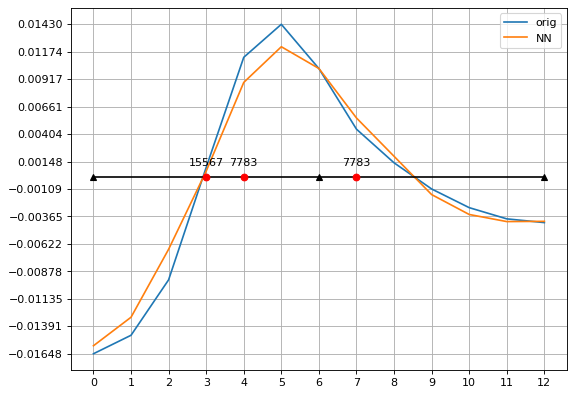

[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.] [12048.45249426  6024.22624713 24096.90498852]


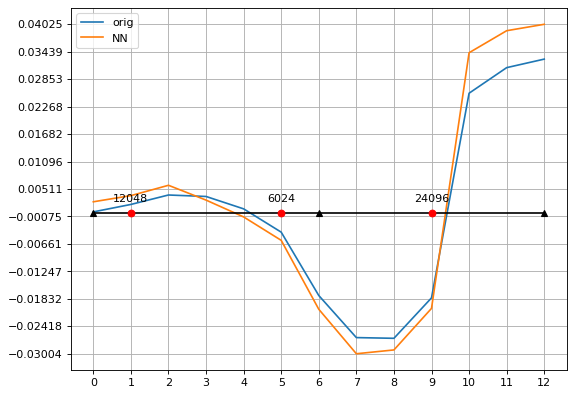

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] [ 95.18812729  95.18812729 190.37625458]


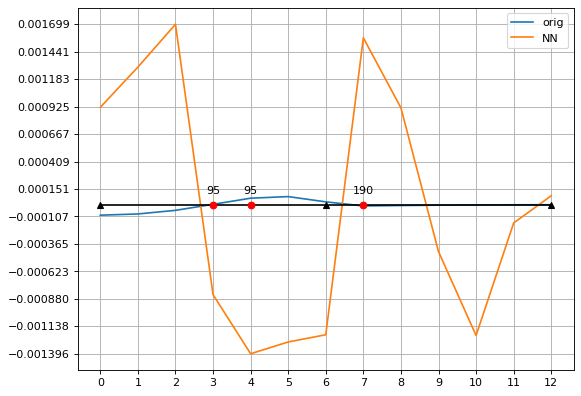

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [13299.74259033 13299.74259033 26599.48518066]


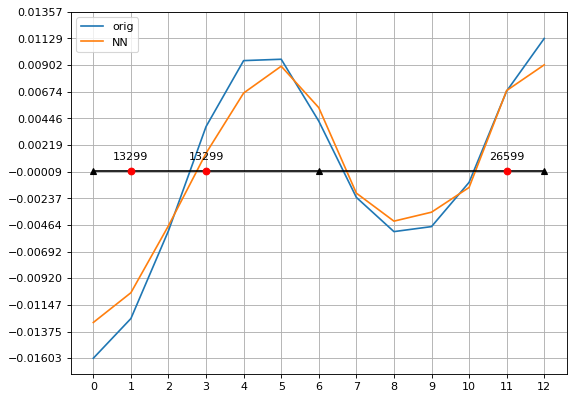

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [14198.09719021  7099.04859511 14198.09719021]


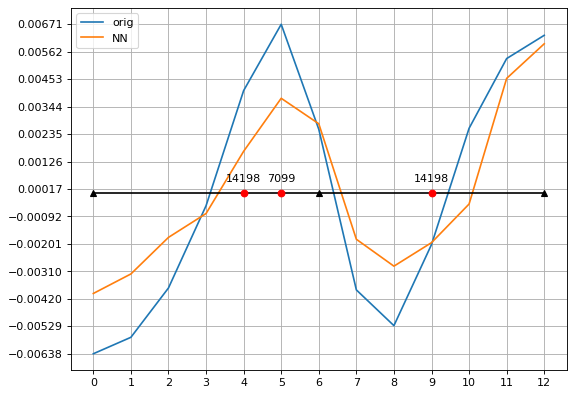

[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.] [3236.39632786 1618.19816393 3236.39632786]


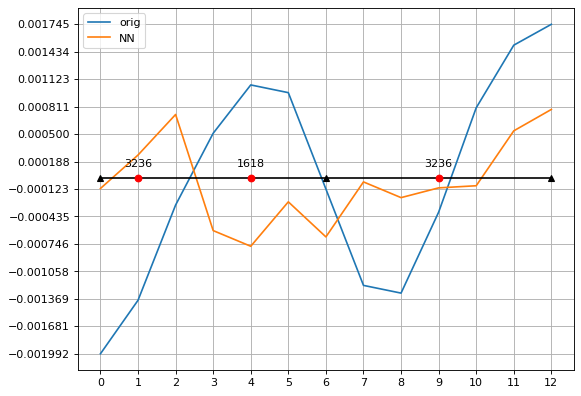

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [ 7615.0501832 15230.1003664  3807.5250916]


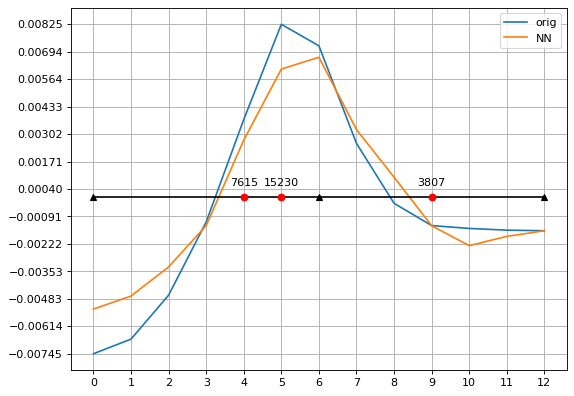

[0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.] [1427.82190935  713.91095467 1427.82190935]


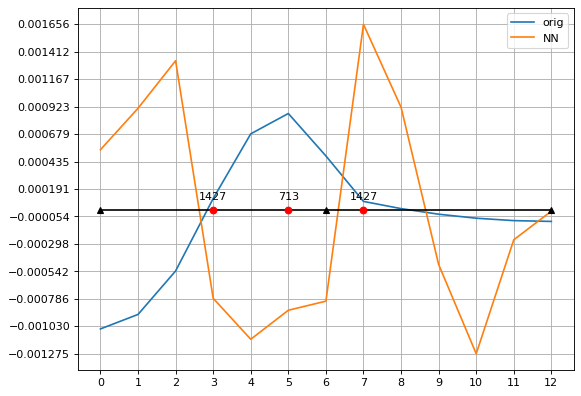

[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.] [ 6802.20850977 13604.41701954  6802.20850977]


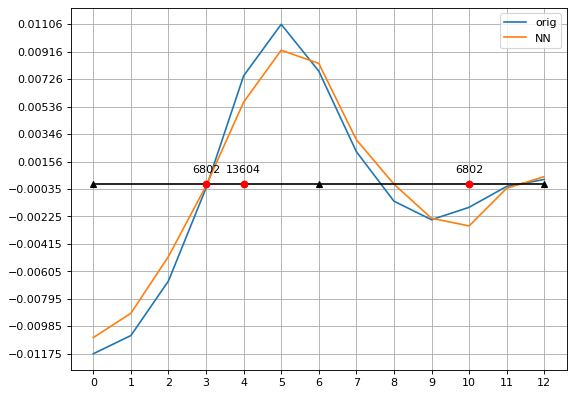

[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.] [13045.47585492 13045.47585492 13045.47585492]


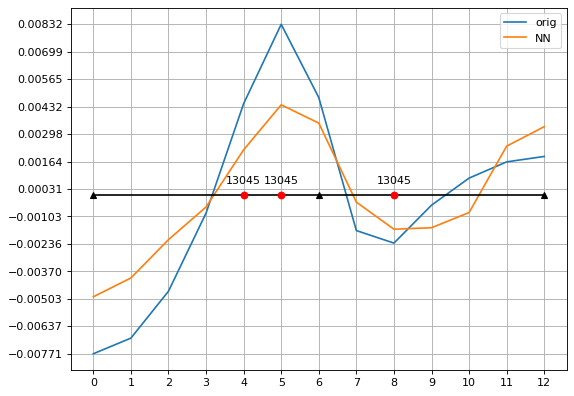

[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.] [7615.0501832 7615.0501832 7615.0501832]


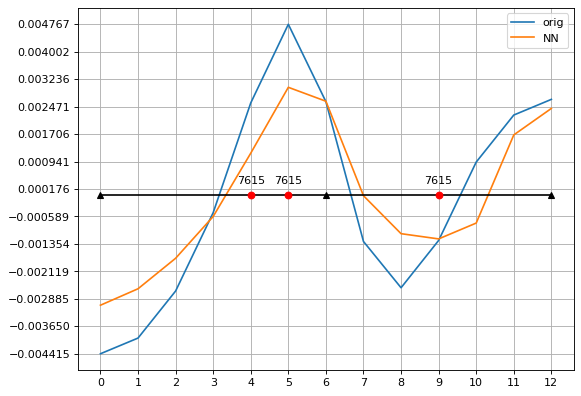

In [19]:
y_pred1 = SK_model.predict([SK_X,SK_Ls[:,:,0]])
import time
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt



for ii in range(20):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    print(SK_X[ii,:,0],SK_Ls[ii,:,0]*1000)
    
    maximo = max([max(y_pred1[ii,:]),max(SK_Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(SK_Y[ii,:])])
        
    plt.plot(SK_Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(SK_X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(int(SK_Ls[ii,i,0]*1000), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

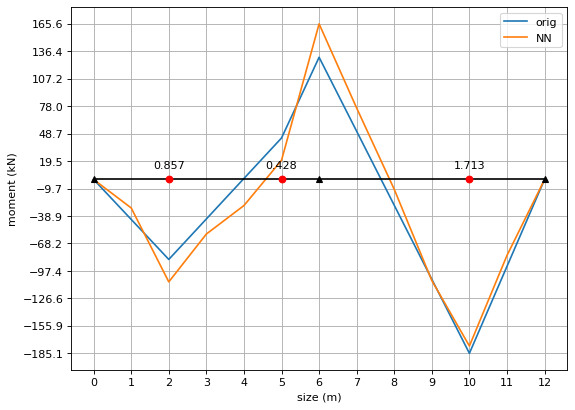

In [20]:
y_pred1 = MOMENT_model.predict([MOMENT_X,MOMENT_Ls[:,:,0]])
import time
from matplotlib.pyplot import figure


for ii in [1581]:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    
    maximo = max([max(y_pred1[ii,:]),max(MOMENT_Y[ii,:])])
    minimo = min([min(y_pred1[ii,:]),min(MOMENT_Y[ii,:])])
        
    plt.plot(MOMENT_Y[ii,:],label='orig')
    plt.plot(y_pred1[ii,:],label='NN')
    #plt.plot(Y[ii,:]-y_pred1[ii,:],label='error')
    
    plt.xlabel('size (m)')
    plt.ylabel('moment (kN)')
    
    plt.plot([0,0,0,0,0,0,0,0,0,0,0,0,0],'k-')
    plt.plot([0,6,12],[0,0,0],'^k')
    loads=np.where(MOMENT_X[ii,:,0]==1)[0]
    plt.plot(loads,[0,0,0],'ro')
    
    for i in range(0,3):
        plt.annotate(round(MOMENT_Ls[ii,i,0],3), # this is the text
        (loads[i],0), # this is the point to label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        ha='center') # horizontal alignment can be left, right or center

        
    stepd=(maximo-minimo)/12.0
    plt.yticks(np.arange(minimo, maximo +stepd ,step=stepd))
    plt.xticks(xticks)
    plt.legend()
    plt.grid()
    plt.show()
    time.sleep(2) 
    plt.close()

In [29]:
#GET REAL RESULTS FOR THE 3 SCENARIOS

SK05 =  pd.read_csv('rotation_alpha05_beta05.csv', header=None)
SK1 =  pd.read_csv('rotation_alpha1_beta1.csv', header=None)
SK2 =  pd.read_csv('rotation_alpha2_beta2.csv', header=None)
MOMENT05 =  pd.read_csv('moment_alpha05_beta05.csv', header=None)
MOMENT1 =  pd.read_csv('moment_alpha1_beta1.csv', header=None)
MOMENT2 =  pd.read_csv('moment_alpha2_beta2.csv', header=None)

sk05=[]
sk1=[]
sk2=[]

moment05=[]
moment1=[]
moment2=[]

load05=[]
load1=[]
load2=[]

for i in range(0,13):
    sk05.append(SK05.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    sk1.append(SK1.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    sk2.append(SK2.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32]])
    
    moment05.append(MOMENT05.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    moment1.append(MOMENT1.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    moment2.append(MOMENT2.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43]])
    
    load05.append(int(SK05.iloc[i][3]*SK05.iloc[i][6]))
    load1.append(int(SK1.iloc[i][3]*SK1.iloc[i][6]))
    load2.append(int(SK2.iloc[i][3]*MOMENT2.iloc[i][6]))

###########################################################################################################
    


#GET NN PREDICTIONS FOR THE 3 SCENARIOS

Pos = np.zeros((13,13,1))
SK_Pesos_05 = np.zeros((13,3,1))
SK_Pesos_1 = np.zeros((13,3,1))
SK_Pesos_2 = np.zeros((13,3,1))
MOMENT_Pesos_05 = np.zeros((13,3,1))
MOMENT_Pesos_1 = np.zeros((13,3,1))
MOMENT_Pesos_2 = np.zeros((13,3,1))

for i in range(13):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    
    
    SK_Pesos_05[i,0,0] = (load05[i]+30*(i+1)*0.001)*0.01          #-SK_l1_min) / (SK_l1_max-SK_l1_min)
    SK_Pesos_05[i,1,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5    #-SK_l2_min) / (SK_l2_max-SK_l2_min)
    SK_Pesos_05[i,2,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5        #-SK_l3_min) / (SK_l3_max-SK_l3_min)
    SK_Pesos_1[i,0,0] = (load1[i]+30*(i+1)*0.001)*0.01          #-SK_l1_min) / (SK_l1_max-SK_l1_min)
    SK_Pesos_1[i,1,0] = (load1[i]+30*(i+1)*0.001)*0.01          #-SK_l2_min) / (SK_l2_max-SK_l2_min)
    SK_Pesos_1[i,2,0] = (load1[i]+30*(i+1)*0.001)*0.01          #-SK_l3_min) / (SK_l3_max-SK_l3_min)
    SK_Pesos_2[i,0,0] = (load2[i]+30*(i+1)*0.001)*0.01          #-SK_l1_min) / (SK_l1_max-SK_l1_min)
    SK_Pesos_2[i,1,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2          #-SK_l2_min) / (SK_l2_max-SK_l2_min)
    SK_Pesos_2[i,2,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2          #-SK_l3_min) / (SK_l3_max-SK_l3_min)
    
    MOMENT_Pesos_05[i,0,0] = (load05[i]+30*(i+1)*0.001)*0.01            #-MOMENT_l1_min) / (MOMENT_l1_max-MOMENT_l1_min)
    MOMENT_Pesos_05[i,1,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5            #-MOMENT_l2_min) / (MOMENT_l2_max-MOMENT_l2_min)
    MOMENT_Pesos_05[i,2,0] = ((load05[i]+30*(i+1)*0.001)*0.01)*0.5           #-MOMENT_l3_min) / (MOMENT_l3_max-MOMENT_l3_min)
    MOMENT_Pesos_1[i,0,0] = (load1[i]+30*(i+1)*0.001)*0.01             #-MOMENT_l1_min) / (MOMENT_l1_max-MOMENT_l1_min)
    MOMENT_Pesos_1[i,1,0] = (load1[i]+30*(i+1)*0.001)*0.01          #-MOMENT_l2_min) / (MOMENT_l2_max-MOMENT_l2_min)
    MOMENT_Pesos_1[i,2,0] = (load1[i]+30*(i+1)*0.001)*0.01          #-MOMENT_l3_min) / (MOMENT_l3_max-MOMENT_l3_min)
    MOMENT_Pesos_2[i,0,0] = (load2[i]+30*(i+1)*0.001)*0.01          #-MOMENT_l1_min) / (MOMENT_l1_max-MOMENT_l1_min)
    MOMENT_Pesos_2[i,1,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2          #-MOMENT_l2_min) / (MOMENT_l2_max-MOMENT_l2_min)
    MOMENT_Pesos_2[i,2,0] = ((load2[i]+30*(i+1)*0.001)*0.01)*2          #-MOMENT_l3_min) / (MOMENT_l3_max-MOMENT_l3_min)
    
    
Inc_MOMENT_05 = MOMENT_model.predict([Pos,MOMENT_Pesos_05[:,:,0]])
Inc_MOMENT_1 = MOMENT_model.predict([Pos,MOMENT_Pesos_1[:,:,0]])
Inc_MOMENT_2 = MOMENT_model.predict([Pos,MOMENT_Pesos_2[:,:,0]])
Inc_SK_05 = SK_model.predict([Pos,SK_Pesos_05[:,:,0]])
Inc_SK_1 = SK_model.predict([Pos,SK_Pesos_1[:,:,0]])
Inc_SK_2 = SK_model.predict([Pos,SK_Pesos_2[:,:,0]])


In [30]:

#PLOT THEM NEXT TO EACH OTHER
def make_graph(_xx,_var,sk,_load,_title):
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,13):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(_load[i])+'N-Rede') 
        plt.plot(_xx,sk[i],'b',label=str(_load[i])+'N-Original')

    
    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    
###########################################

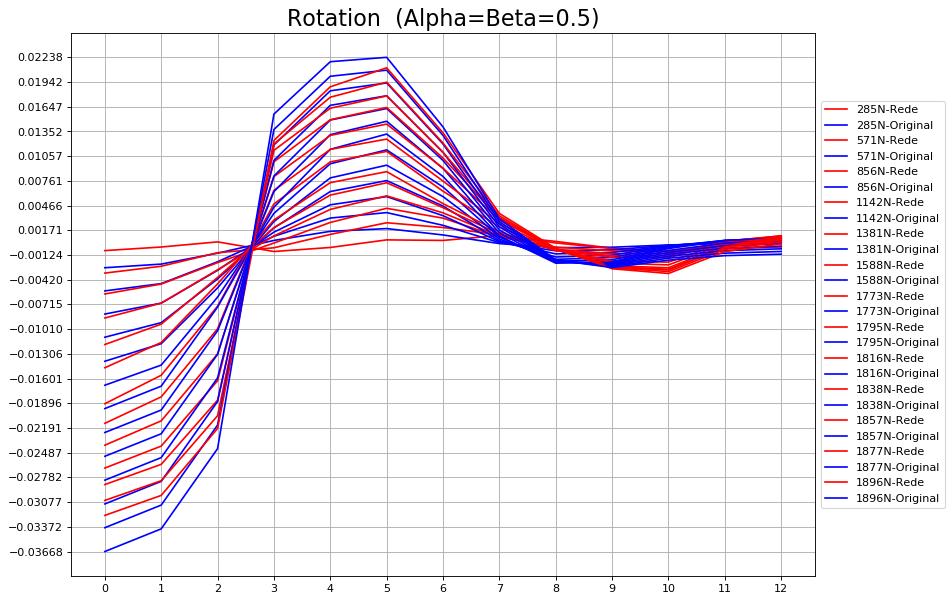

Posição 	 Erro Relativo Médio
0 metros 	19.67%
1 metros 	23.69%
2 metros 	25.96%
3 metros 	53.25%
4 metros 	33.12%
5 metros 	22.14%
6 metros 	18.35%
7 metros 	168.27%
8 metros 	90.99%
9 metros 	14.41%
10 metros 	481.06%
11 metros 	84.83%
12 metros 	157.42%


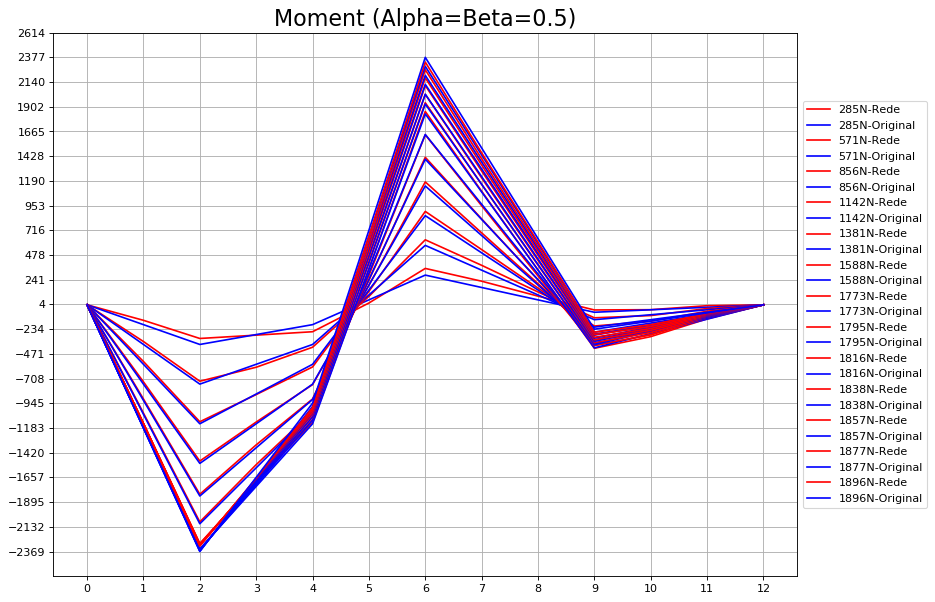

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	5.13%
2 metros 	3.28%
3 metros 	1.75%
4 metros 	5.21%
5 metros 	11.08%
6 metros 	4.04%
7 metros 	6.12%
8 metros 	12.99%
9 metros 	8.04%
10 metros 	14.22%
11 metros 	11.51%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [31]:
make_graph(xticks,Inc_SK_05,sk05,load05,'Rotation  (Alpha=Beta=0.5)')
make_graph(xticks,Inc_MOMENT_05,moment05,load05,'Moment (Alpha=Beta=0.5)')


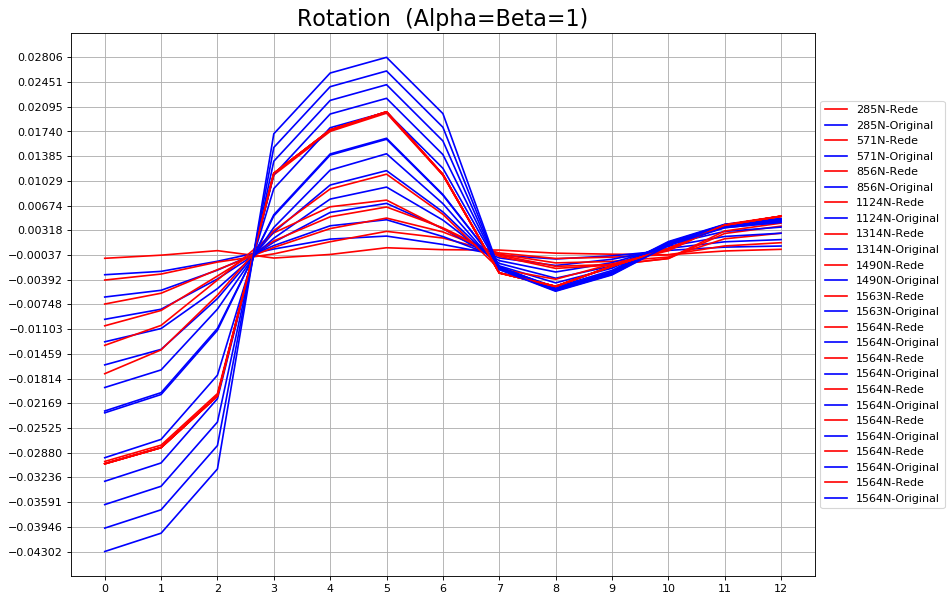

Posição 	 Erro Relativo Médio
0 metros 	26.91%
1 metros 	31.64%
2 metros 	46.98%
3 metros 	65.87%
4 metros 	36.91%
5 metros 	28.8%
6 metros 	32.07%
7 metros 	60.79%
8 metros 	30.57%
9 metros 	33.0%
10 metros 	112.89%
11 metros 	15.39%
12 metros 	14.93%


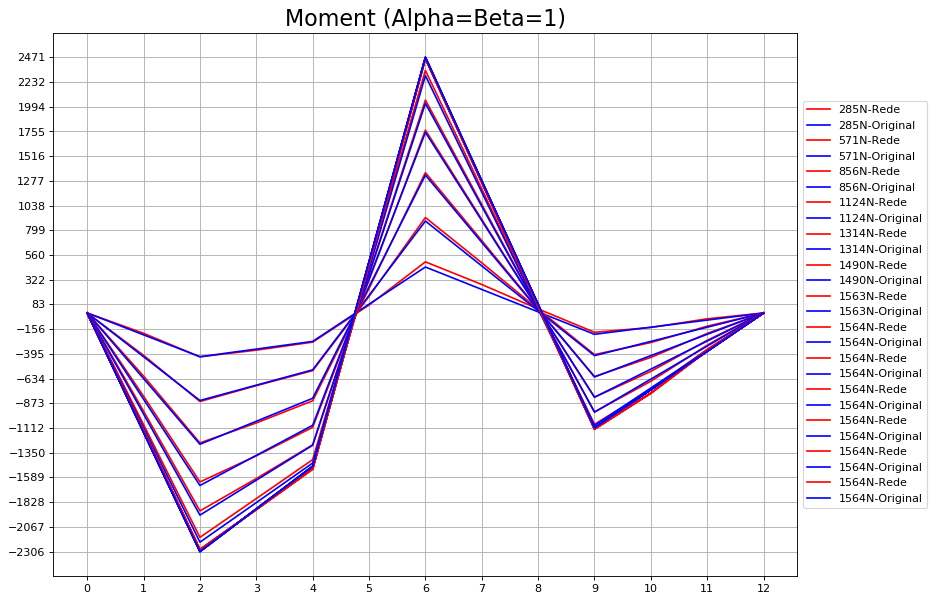

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	2.65%
2 metros 	1.18%
3 metros 	0.89%
4 metros 	1.95%
5 metros 	5.73%
6 metros 	2.05%
7 metros 	3.55%
8 metros 	45.8%
9 metros 	1.69%
10 metros 	4.25%
11 metros 	4.1%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


In [32]:
make_graph(xticks,Inc_SK_1,sk1,load1,'Rotation  (Alpha=Beta=1)')
make_graph(xticks,Inc_MOMENT_1,moment1,load1,'Moment (Alpha=Beta=1)')

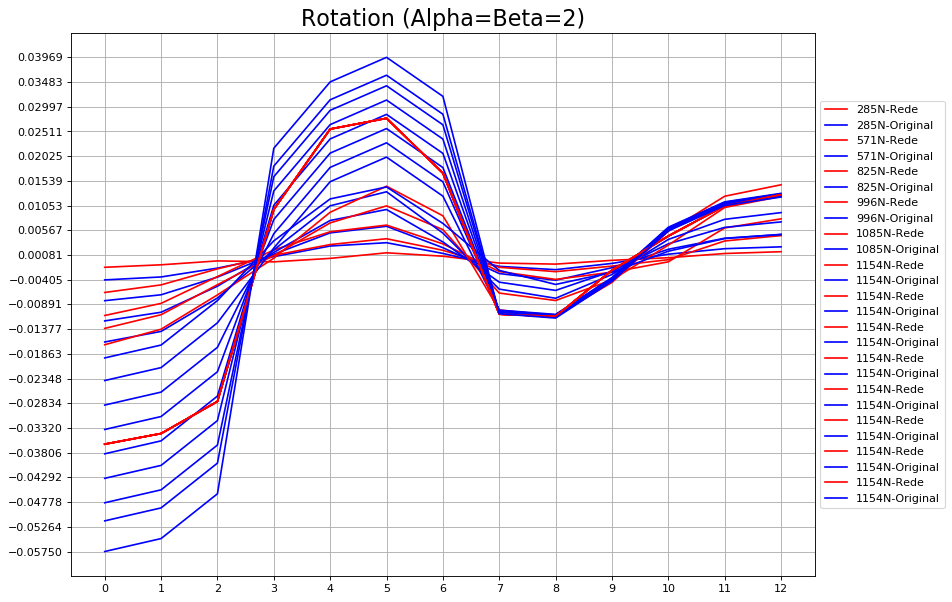

Posição 	 Erro Relativo Médio
0 metros 	26.46%
1 metros 	30.68%
2 metros 	44.13%
3 metros 	89.21%
4 metros 	35.3%
5 metros 	25.52%
6 metros 	28.52%
7 metros 	44.4%
8 metros 	22.72%
9 metros 	47.91%
10 metros 	63.29%
11 metros 	27.27%
12 metros 	25.02%


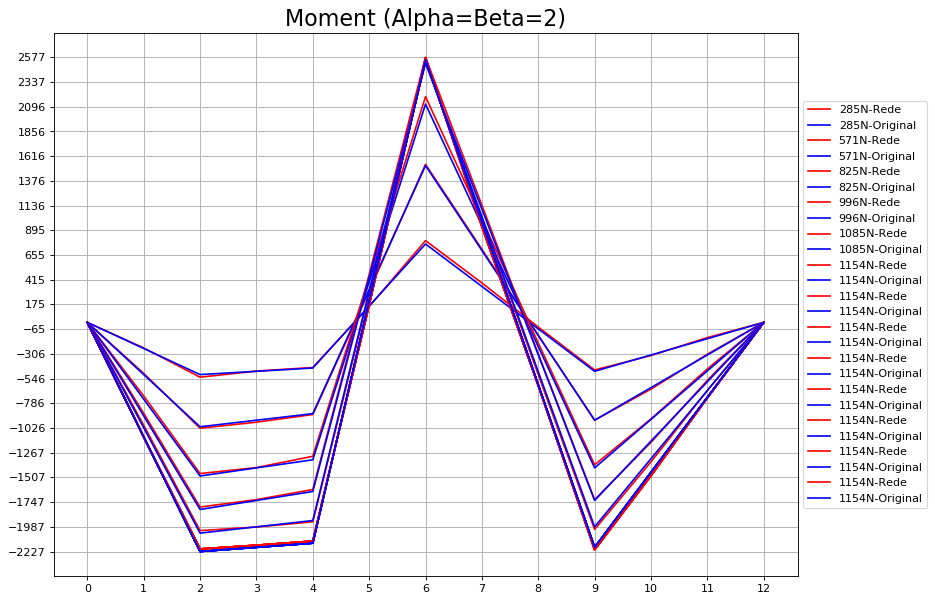

Posição 	 Erro Relativo Médio
0 metros 	inf%
1 metros 	1.19%
2 metros 	1.62%
3 metros 	0.89%
4 metros 	1.17%
5 metros 	14.41%
6 metros 	1.44%
7 metros 	4.72%
8 metros 	5.31%
9 metros 	1.27%
10 metros 	2.11%
11 metros 	1.72%
12 metros 	inf%


c:\users\nuno\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


In [33]:
make_graph(xticks,Inc_SK_2,sk2,load2,'Rotation (Alpha=Beta=2)')
make_graph(xticks,Inc_MOMENT_2,moment2,load2,'Moment (Alpha=Beta=2)')

In [34]:
#GET BOTH REAL RESULTS AND NN PREDICTION FOR THE MOMENT AND ROTATION IN THE ROTULA POINTS

Numero_iteracoes=13
Passo=30

momento_apoio_05=[]
rotacao_apoio_05=[]
momento_carga_05=[]
rotacao_carga_05=[]
momento_carga2_05=[]
rotacao_carga2_05=[]
momento_meiovao2_05=[]
rotacao_meiovao2_05=[]
momento_apoio_orig_05=[]
rotacao_apoio_orig_05=[]
momento_carga_orig_05=[]
rotacao_carga_orig_05=[]
momento_carga2_orig_05=[]
rotacao_carga2_orig_05=[]
momento_meiovao2_orig_05=[]
rotacao_meiovao2_orig_05=[]



momento_apoio_1=[]
rotacao_apoio_1=[]
momento_carga_1=[]
rotacao_carga_1=[]
momento_carga2_1=[]
rotacao_carga2_1=[]
momento_meiovao2_1=[]
rotacao_meiovao2_1=[]
momento_apoio_orig_1=[]
rotacao_apoio_orig_1=[]
momento_carga_orig_1=[]
rotacao_carga_orig_1=[]
momento_carga2_orig_1=[]
rotacao_carga2_orig_1=[]
momento_meiovao2_orig_1=[]
rotacao_meiovao2_orig_1=[]



momento_apoio_2=[]
rotacao_apoio_2=[]
momento_carga_2=[]
rotacao_carga_2=[]
momento_carga2_2=[]
rotacao_carga2_2=[]
momento_meiovao2_2=[]
rotacao_meiovao2_2=[]
momento_apoio_orig_2=[]
rotacao_apoio_orig_2=[]
momento_carga_orig_2=[]
rotacao_carga_orig_2=[]
momento_carga2_orig_2=[]
rotacao_carga2_orig_2=[]
momento_meiovao2_orig_2=[]
rotacao_meiovao2_orig_2=[]




for i in range(0,Numero_iteracoes):
   
    momento_carga_05.append(Inc_MOMENT_05[i][2])
    rotacao_carga_05.append(Inc_SK_05[i][2])

    momento_carga2_05.append(Inc_MOMENT_05[i][4])
    rotacao_carga2_05.append(Inc_SK_1[i][4])

    momento_apoio_05.append(Inc_MOMENT_05[i][6])
    rotacao_apoio_05.append(Inc_SK_05[i][6])
    
    momento_meiovao2_05.append(Inc_MOMENT_05[i][9])
    rotacao_meiovao2_05.append(Inc_SK_05[i][9])
    
    momento_carga_orig_05.append(moment05[i][13])
    rotacao_carga_orig_05.append(sk05[i][10])
    momento_carga2_orig_05.append(moment05[i][19])
    rotacao_carga2_orig_05.append(sk05[i][14])

    momento_apoio_orig_05.append(moment05[i][25])
    rotacao_apoio_orig_05.append(sk05[i][20])
    
    momento_meiovao2_orig_05.append(moment05[i][34])
    rotacao_meiovao2_orig_05.append(sk05[i][26])
    

    
     
    
    momento_carga_1.append(Inc_MOMENT_1[i][2])
    rotacao_carga_1.append(Inc_SK_1[i][2])

    momento_carga2_1.append(Inc_MOMENT_1[i][4])
    rotacao_carga2_1.append(Inc_SK_1[i][4])

    momento_apoio_1.append(Inc_MOMENT_1[i][6])
    rotacao_apoio_1.append(Inc_SK_1[i][6])
    
    momento_meiovao2_1.append(Inc_MOMENT_1[i][9])
    rotacao_meiovao2_1.append(Inc_SK_1[i][9])
    
    momento_carga_orig_1.append(moment1[i][13])
    rotacao_carga_orig_1.append(sk1[i][10])
    momento_carga2_orig_1.append(moment1[i][19])
    rotacao_carga2_orig_1.append(sk1[i][14])

    momento_apoio_orig_1.append(moment1[i][25])
    rotacao_apoio_orig_1.append(sk1[i][20])
    
    momento_meiovao2_orig_1.append(moment1[i][34])
    rotacao_meiovao2_orig_1.append(sk1[i][26])
    
    

      
    momento_carga_2.append(Inc_MOMENT_2[i][2])
    rotacao_carga_2.append(Inc_SK_2[i][2])

    momento_carga2_2.append(Inc_MOMENT_2[i][4])
    rotacao_carga2_2.append(Inc_SK_2[i][4])

    momento_apoio_2.append(Inc_MOMENT_2[i][6])
    rotacao_apoio_2.append(Inc_SK_2[i][6])
    
    momento_meiovao2_2.append(Inc_MOMENT_2[i][9])
    rotacao_meiovao2_2.append(Inc_SK_2[i][9])
    
    momento_carga_orig_2.append(moment2[i][13])
    rotacao_carga_orig_2.append(sk2[i][10])
    momento_carga2_orig_2.append(moment2[i][19])
    rotacao_carga2_orig_2.append(sk2[i][14])

    momento_apoio_orig_2.append(moment2[i][25])
    rotacao_apoio_orig_2.append(sk2[i][20])
    
    momento_meiovao2_orig_2.append(moment2[i][34])
    rotacao_meiovao2_orig_2.append(sk2[i][26])
    

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def make_graph_MxR(rotacao,momento,rotacao_orig, momento_orig,_load,title):

    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


    plt.plot(rotacao,momento,label='NN') 
    plt.plot(rotacao_orig,momento_orig,label='Original')
    plt.legend()
    plt.grid()
    
    plt.xlabel('rotation')
    plt.ylabel('moment')
    plt.title(title)
    stepd=(max(max(momento),max(momento_orig)) - min(min(momento),min(momento_orig)))/10.0
    plt.yticks(np.arange(min(min(momento),min(momento_orig)), max(max(momento),max(momento_orig))+stepd ,step=stepd))

    stepd=(max(max(rotacao),max(rotacao_orig)) - min(min(rotacao),min(rotacao_orig)))/10.0
    plt.xticks(np.arange(min(min(rotacao),min(rotacao_orig)), max(max(rotacao),max(rotacao_orig))+stepd ,step=stepd))


    for i in range(0,Numero_iteracoes):
        #label=int((i+1)*Passo)
        plt.annotate(_load[i], # this is the text
                 (rotacao[i],momento[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='blue')
        plt.annotate(_load[i], # this is the text
                 (rotacao_orig[i],momento_orig[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='red')

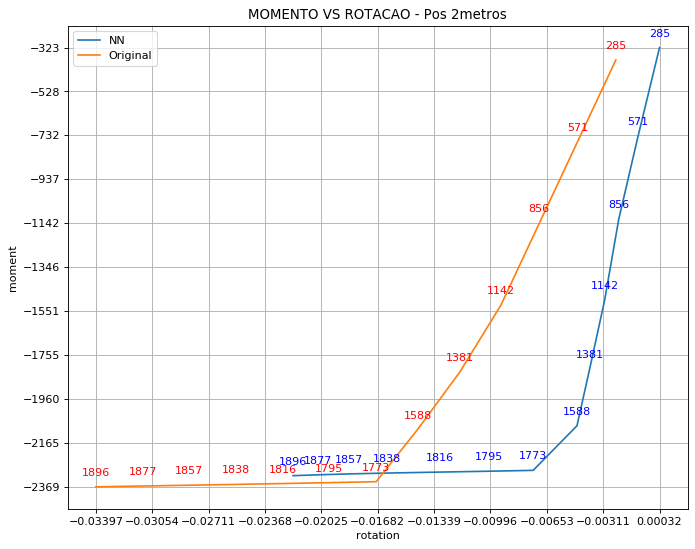

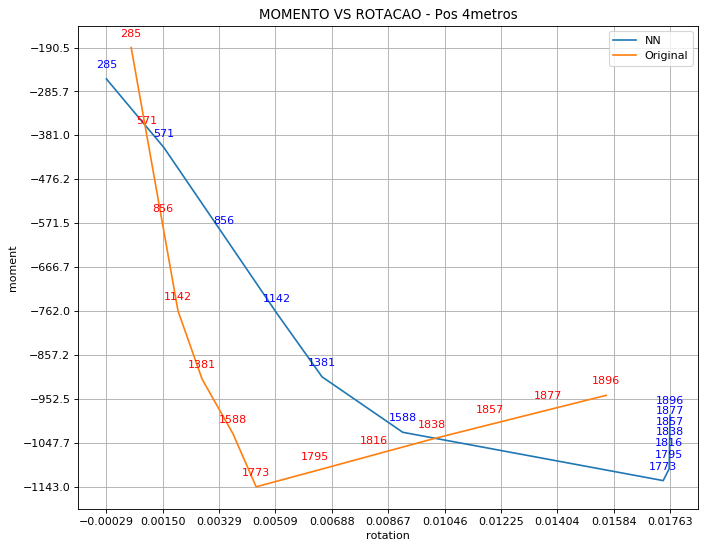

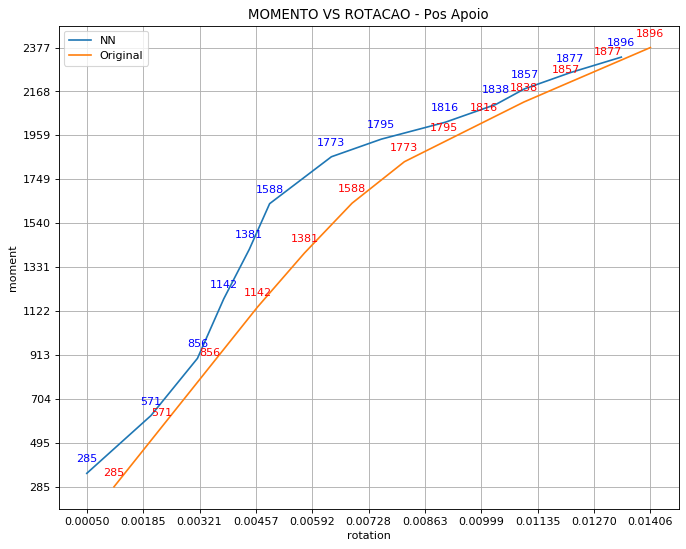

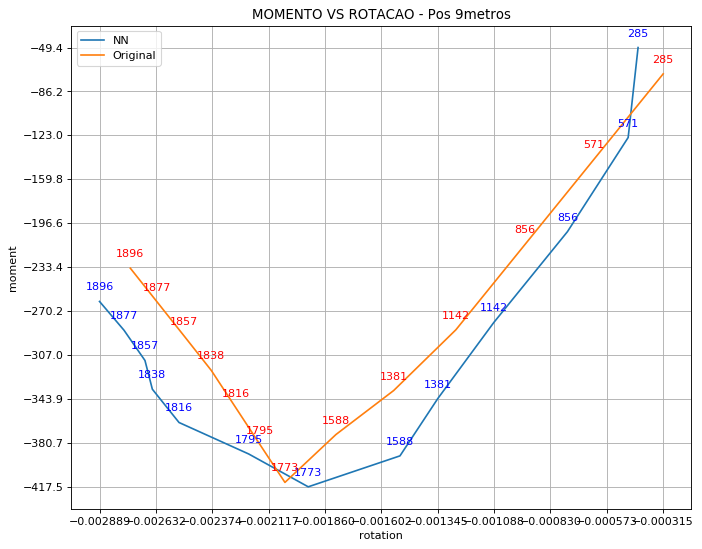

In [36]:
make_graph_MxR(rotacao_carga_05,momento_carga_05,rotacao_carga_orig_05,momento_carga_orig_05,load05,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_05,momento_carga2_05,rotacao_carga2_orig_05,momento_carga2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_05,momento_apoio_05,rotacao_apoio_orig_05,momento_apoio_orig_05,load05,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_05,momento_meiovao2_05,rotacao_meiovao2_orig_05,momento_meiovao2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 9metros')

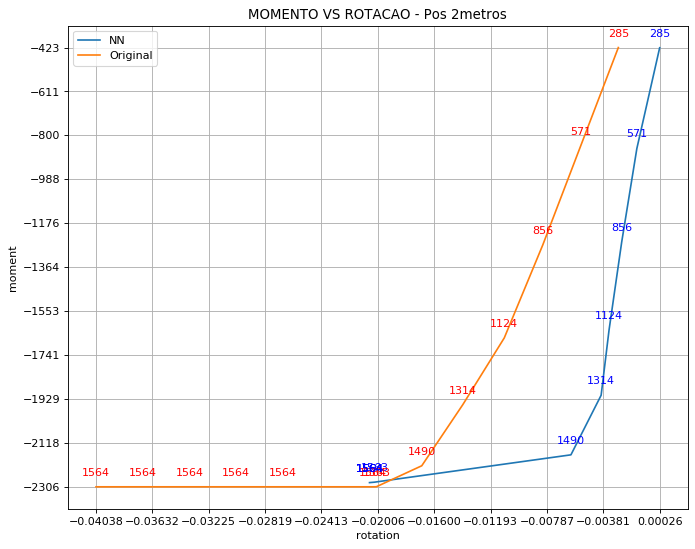

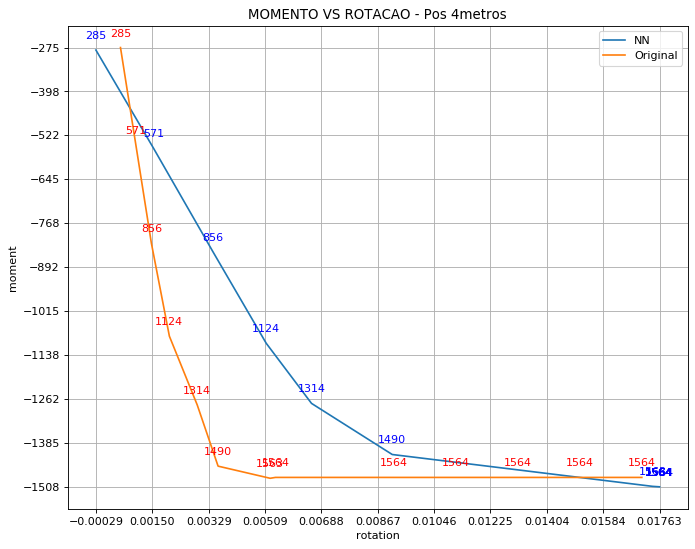

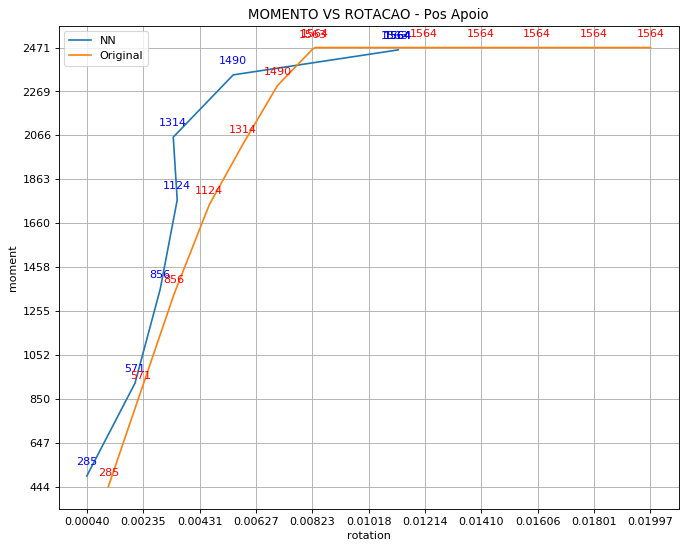

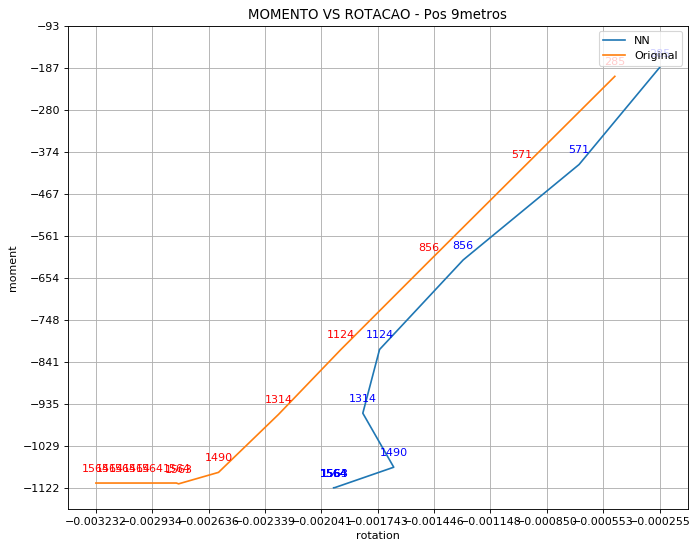

In [37]:
make_graph_MxR(rotacao_carga_1,momento_carga_1,rotacao_carga_orig_1,momento_carga_orig_1,load1,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_1,momento_carga2_1,rotacao_carga2_orig_1,momento_carga2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_1,momento_apoio_1,rotacao_apoio_orig_1,momento_apoio_orig_1,load1,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_1,momento_meiovao2_1,rotacao_meiovao2_orig_1,momento_meiovao2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 9metros')

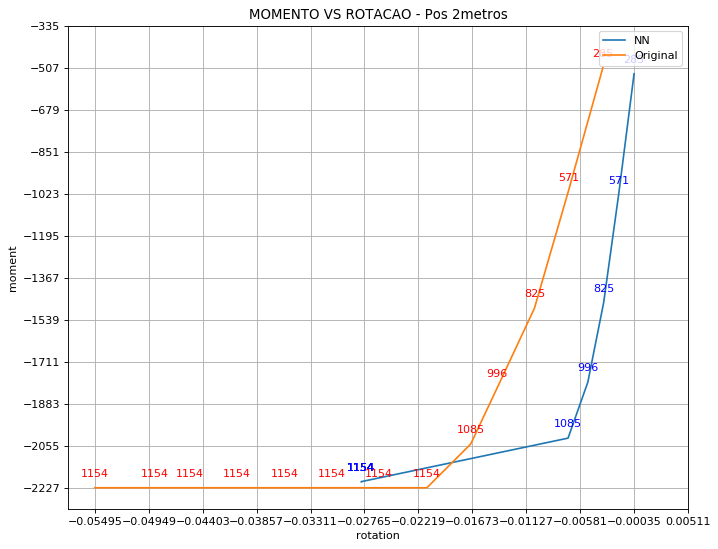

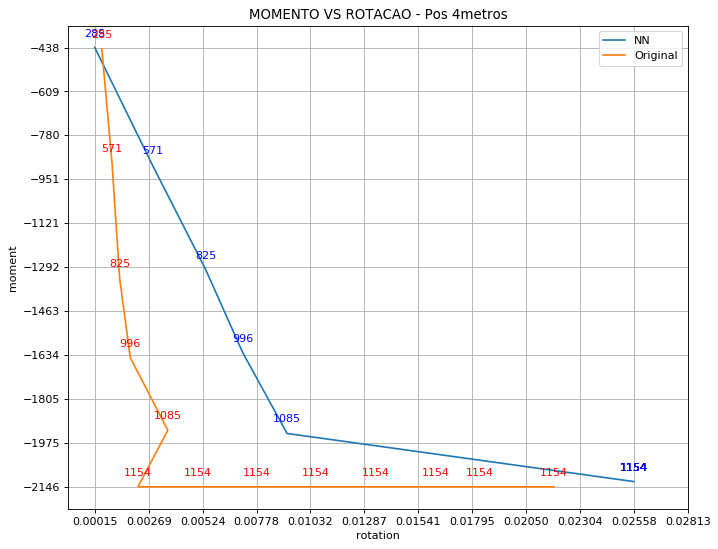

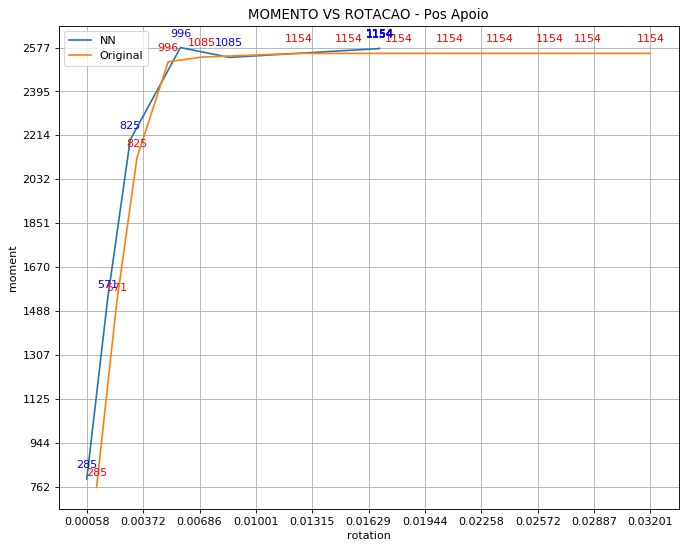

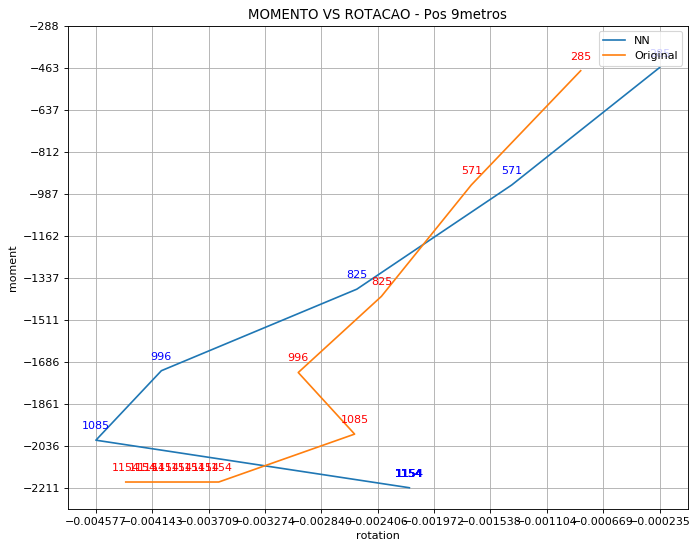

In [38]:
make_graph_MxR(rotacao_carga_2,momento_carga_2,rotacao_carga_orig_2,momento_carga_orig_2,load2,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_MxR(rotacao_carga2_2,momento_carga2_2,rotacao_carga2_orig_2,momento_carga2_orig_2,load2,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_MxR(rotacao_apoio_2,momento_apoio_2,rotacao_apoio_orig_2,momento_apoio_orig_2,load2,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_MxR(rotacao_meiovao2_2,momento_meiovao2_2,rotacao_meiovao2_orig_2,momento_meiovao2_orig_2,load2,'MOMENTO VS ROTACAO - Pos 9metros')

In [39]:
solo_Pos = np.zeros((80,13,1))
solo_SK_Pesos_05 = np.zeros((80,3,1))
solo_SK_Pesos_1 = np.zeros((80,3,1))
solo_SK_Pesos_2 = np.zeros((80,3,1))
solo_MOMENT_Pesos_05 = np.zeros((80,3,1))
solo_MOMENT_Pesos_1 = np.zeros((80,3,1))
solo_MOMENT_Pesos_2 = np.zeros((80,3,1))


for i in range(80):
    solo_Pos[i,2,0] = 1
    solo_Pos[i,4,0] = 1
    solo_Pos[i,9,0] = 1
    
    solo_SK_Pesos_05[i,0,0] = 25*(i+1)*0.01         
    solo_SK_Pesos_05[i,1,0] = (25*(i+1)*0.01)*0.5   
    solo_SK_Pesos_05[i,2,0] = (25*(i+1)*0.01)*0.5        
    solo_SK_Pesos_1[i,0,0] = 25*(i+1)*0.01      
    solo_SK_Pesos_1[i,1,0] = 25*(i+1)*0.01   
    solo_SK_Pesos_1[i,2,0] = 25*(i+1)*0.01        
    solo_SK_Pesos_2[i,0,0] = 25*(i+1)*0.01  
    solo_SK_Pesos_2[i,1,0] = (25*(i+1)*0.01)*2          
    solo_SK_Pesos_2[i,2,0] = (25*(i+1)*0.01)*2        
    
    solo_MOMENT_Pesos_05[i,0,0] = 25*(i+1)*0.01           
    solo_MOMENT_Pesos_05[i,1,0] = (25*(i+1)*0.01)*0.5          
    solo_MOMENT_Pesos_05[i,2,0] = (25*(i+1)*0.01)*0.5         
    solo_MOMENT_Pesos_1[i,0,0] = 25*(i+1)*0.01             
    solo_MOMENT_Pesos_1[i,1,0] = 25*(i+1)*0.01
    solo_MOMENT_Pesos_1[i,2,0] = 25*(i+1)*0.01     
    solo_MOMENT_Pesos_2[i,0,0] = 25*(i+1)*0.01     
    solo_MOMENT_Pesos_2[i,1,0] = (25*(i+1)*0.01)*2         
    solo_MOMENT_Pesos_2[i,2,0] = (25*(i+1)*0.01)*2 
    
    
solo_Inc_MOMENT_05 = MOMENT_model.predict([solo_Pos,solo_MOMENT_Pesos_05[:,:,0]])
solo_Inc_MOMENT_1 = MOMENT_model.predict([solo_Pos,solo_MOMENT_Pesos_1[:,:,0]])
solo_Inc_MOMENT_2 = MOMENT_model.predict([solo_Pos,solo_MOMENT_Pesos_2[:,:,0]])
solo_Inc_SK_05 = SK_model.predict([solo_Pos,solo_SK_Pesos_05[:,:,0]])
solo_Inc_SK_1 = SK_model.predict([solo_Pos,solo_SK_Pesos_1[:,:,0]])
solo_Inc_SK_2 = SK_model.predict([solo_Pos,solo_SK_Pesos_2[:,:,0]])


In [40]:
#GET BOTH REAL RESULTS AND NN PREDICTION FOR THE MOMENT AND ROTATION IN THE ROTULA POINTS

Numero_iteracoes=13
Passo=30

solo_momento_apoio_05=[]
solo_rotacao_apoio_05=[]
solo_momento_carga_05=[]
solo_rotacao_carga_05=[]
solo_momento_carga2_05=[]
solo_rotacao_carga2_05=[]
solo_momento_meiovao2_05=[]
solo_rotacao_meiovao2_05=[]



solo_momento_apoio_1=[]
solo_rotacao_apoio_1=[]
solo_momento_carga_1=[]
solo_rotacao_carga_1=[]
solo_momento_carga2_1=[]
solo_rotacao_carga2_1=[]
solo_momento_meiovao2_1=[]
solo_rotacao_meiovao2_1=[]




solo_momento_apoio_2=[]
solo_rotacao_apoio_2=[]
solo_momento_carga_2=[]
solo_rotacao_carga_2=[]
solo_momento_carga2_2=[]
solo_rotacao_carga2_2=[]
solo_momento_meiovao2_2=[]
solo_rotacao_meiovao2_2=[]





for i in range(0,80):
   
    solo_momento_carga_05.append(solo_Inc_MOMENT_05[i][2])
    solo_rotacao_carga_05.append(solo_Inc_SK_05[i][2])

    solo_momento_carga2_05.append(solo_Inc_MOMENT_05[i][4])
    solo_rotacao_carga2_05.append(solo_Inc_SK_1[i][4])

    solo_momento_apoio_05.append(solo_Inc_MOMENT_05[i][6])
    solo_rotacao_apoio_05.append(solo_Inc_SK_05[i][6])
    
    solo_momento_meiovao2_05.append(solo_Inc_MOMENT_05[i][9])
    solo_rotacao_meiovao2_05.append(solo_Inc_SK_05[i][9])
    
     
    
    solo_momento_carga_1.append(solo_Inc_MOMENT_1[i][2])
    solo_rotacao_carga_1.append(solo_Inc_SK_1[i][2])

    solo_momento_carga2_1.append(solo_Inc_MOMENT_1[i][4])
    solo_rotacao_carga2_1.append(solo_Inc_SK_1[i][4])

    solo_momento_apoio_1.append(solo_Inc_MOMENT_1[i][6])
    solo_rotacao_apoio_1.append(solo_Inc_SK_1[i][6])
    
    solo_momento_meiovao2_1.append(solo_Inc_MOMENT_1[i][9])
    solo_rotacao_meiovao2_1.append(solo_Inc_SK_1[i][9])
    

      
    solo_momento_carga_2.append(solo_Inc_MOMENT_2[i][2])
    solo_rotacao_carga_2.append(solo_Inc_SK_2[i][2])

    solo_momento_carga2_2.append(solo_Inc_MOMENT_2[i][4])
    solo_rotacao_carga2_2.append(solo_Inc_SK_2[i][4])

    solo_momento_apoio_2.append(solo_Inc_MOMENT_2[i][6])
    solo_rotacao_apoio_2.append(solo_Inc_SK_2[i][6])
    
    solo_momento_meiovao2_2.append(solo_Inc_MOMENT_2[i][9])
    solo_rotacao_meiovao2_2.append(solo_Inc_SK_2[i][9])


In [41]:
def make_graph_solo_MxR(rotacao,momento,rotacao_orig,momento_orig,_load,title):

    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


    plt.plot(rotacao,momento,label='NN') 
    plt.plot(rotacao_orig,momento_orig,label='Original')
    plt.legend()
    plt.grid()
    
    plt.xlabel('rotation')
    plt.ylabel('moment')
    plt.title(title)
    
    stepd=(max(max(momento),max(momento_orig)) - min(min(momento),min(momento_orig)))/10.0
    plt.yticks(np.arange(min(min(momento),min(momento_orig)), max(max(momento),max(momento_orig))+stepd ,step=stepd))

    stepd=(max(max(rotacao),max(rotacao_orig)) - min(min(rotacao),min(rotacao_orig)))/10.0
    plt.xticks(np.arange(min(min(rotacao),min(rotacao_orig)), max(max(rotacao),max(rotacao_orig))+stepd ,step=stepd))
    
    ponto_min=np.where(momento==min(momento))[0][0]
    
    ponto_max=np.where(momento==max(momento))[0][0]
    
    print((ponto_min+1)*25)
    print(min(momento))
    print(rotacao[ponto_min])
                       
    print((ponto_max+1)*25)
    print(max(momento))
    print(rotacao[ponto_max])
    print()
    
    for i in range(0,80,2):
        label=int((i+1)*25)
        plt.annotate(label, # this is the text
                 (rotacao[i],momento[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='blue')
    for i in range(0,13):
        plt.annotate(int(_load[i]), # this is the text
                 (rotacao_orig[i],momento_orig[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='red')
    plt.show()

2000
-2359.0317
-0.019721203
25
-22.53104
0.0014405325



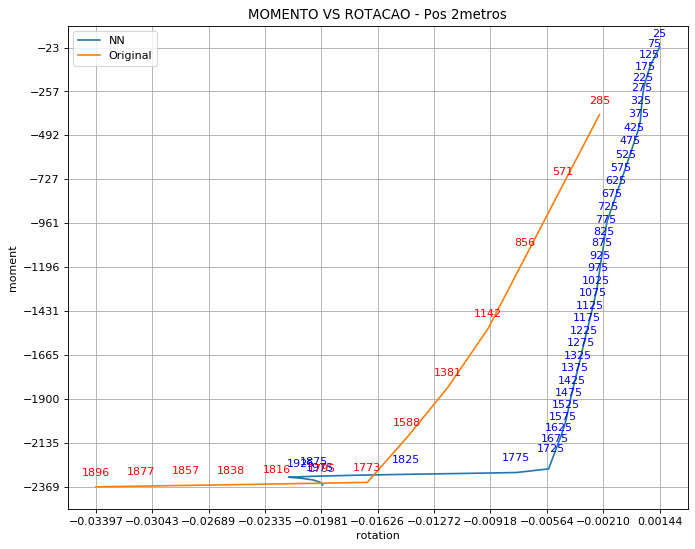

1775
-1127.4623
0.010977194
25
-25.539198
-0.0012015579



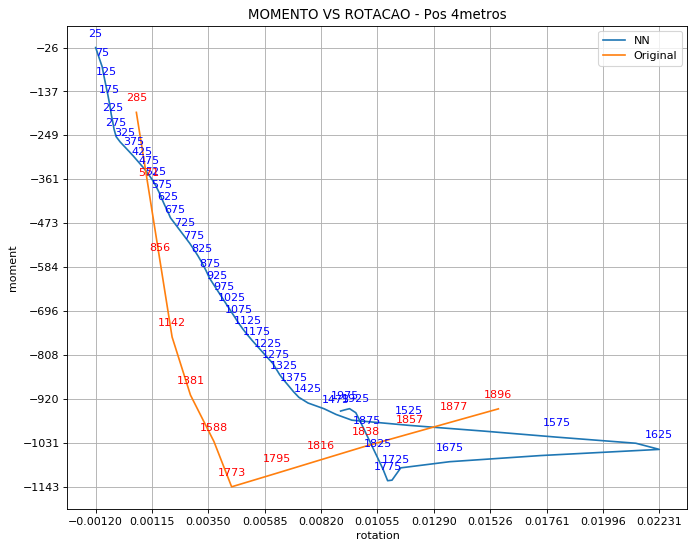

25
87.753
-0.00092868507
2000
2612.5747
0.006877521



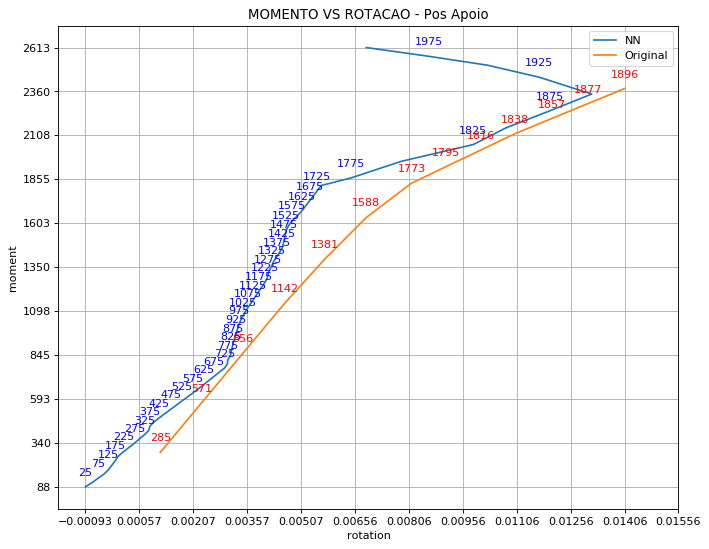

1750
-419.27484
-0.0017714573
25
9.636814
-0.00046734698



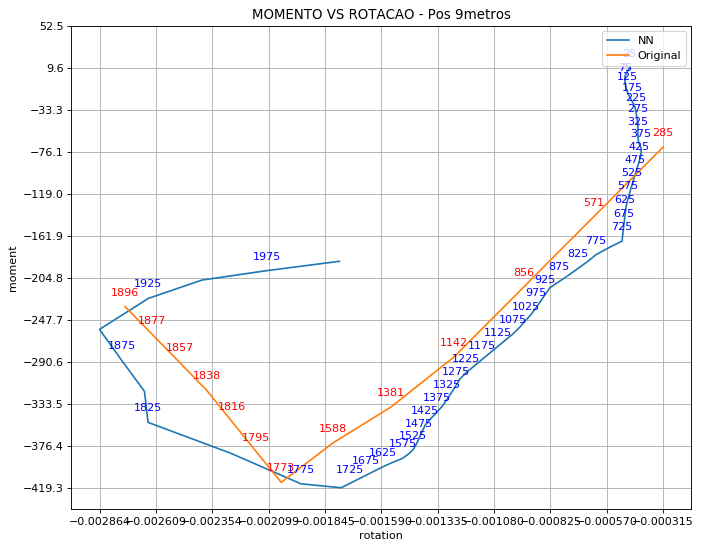

In [42]:
make_graph_solo_MxR(solo_rotacao_carga_05,solo_momento_carga_05,rotacao_carga_orig_05,momento_carga_orig_05,load05,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_solo_MxR(solo_rotacao_carga2_05,solo_momento_carga2_05,rotacao_carga2_orig_05,momento_carga2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_solo_MxR(solo_rotacao_apoio_05,solo_momento_apoio_05,rotacao_apoio_orig_05,momento_apoio_orig_05,load05,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_solo_MxR(solo_rotacao_meiovao2_05,solo_momento_meiovao2_05,rotacao_meiovao2_orig_05,momento_meiovao2_orig_05,load05,'MOMENTO VS ROTACAO - Pos 9metros')

1625
-2331.3484
-0.023217497
25
-28.330072
0.0014133956



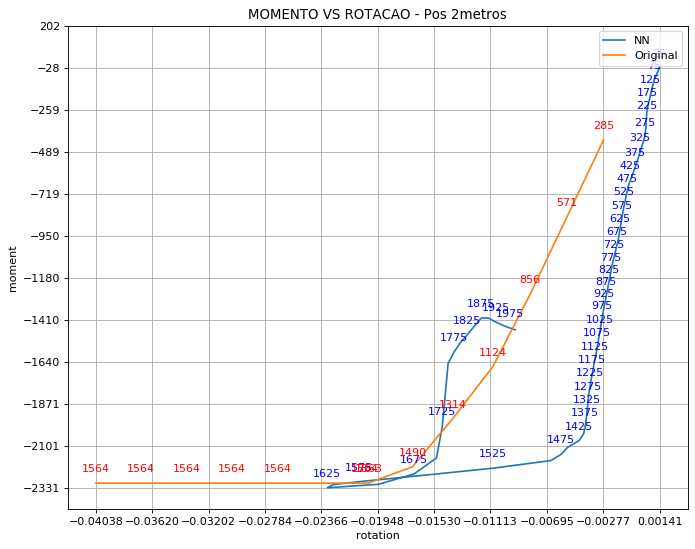

1750
-1643.127
0.0111594815
25
-30.791603
-0.0012015579



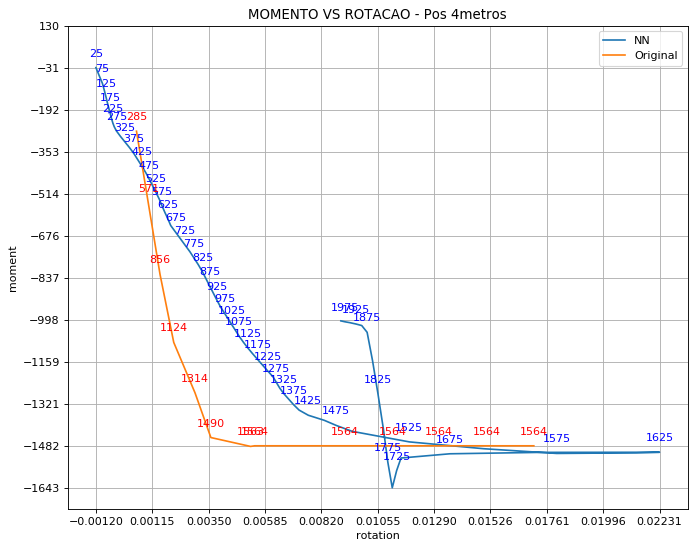

25
100.93049
-0.0008983258
1625
2641.6787
0.01138126



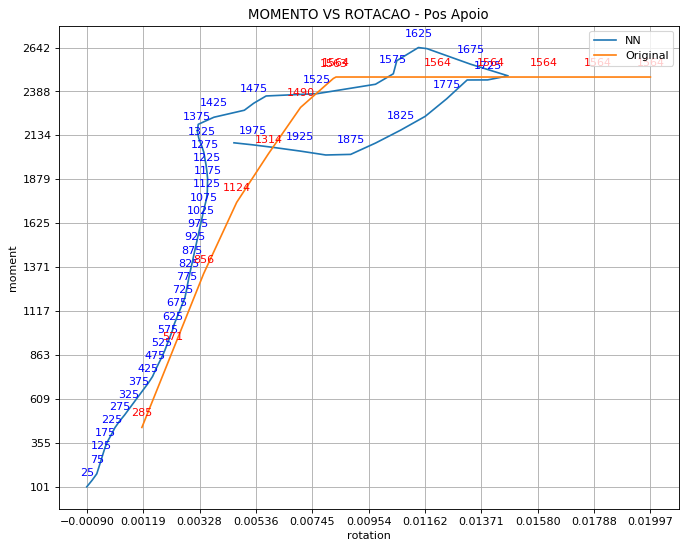

1700
-1265.5304
-0.0040364317
25
-4.3081827
-0.00047055585



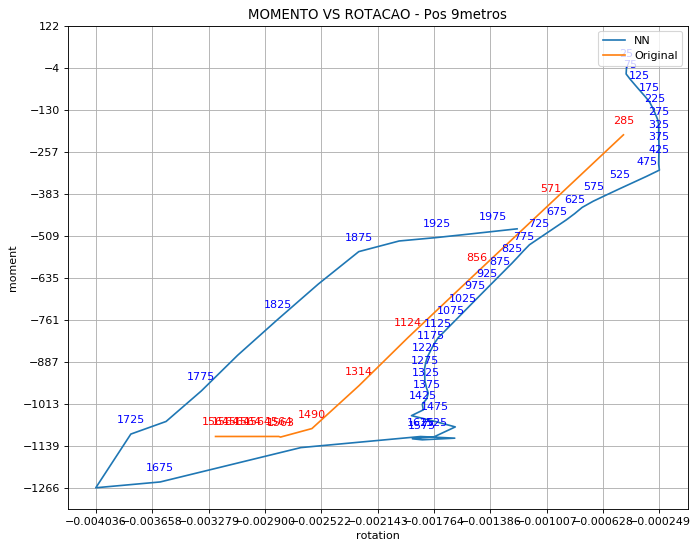

In [43]:
make_graph_solo_MxR(solo_rotacao_carga_1,solo_momento_carga_1,rotacao_carga_orig_1,momento_carga_orig_1,load1,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_solo_MxR(solo_rotacao_carga2_1,solo_momento_carga2_1,rotacao_carga2_orig_1,momento_carga2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_solo_MxR(solo_rotacao_apoio_1,solo_momento_apoio_1,rotacao_apoio_orig_1,momento_apoio_orig_1,load1,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_solo_MxR(solo_rotacao_meiovao2_1,solo_momento_meiovao2_1,rotacao_meiovao2_orig_1,momento_meiovao2_orig_1,load1,'MOMENTO VS ROTACAO - Pos 9metros')

1200
-2251.4624
-0.022119863
25
-40.064907
0.0013580378



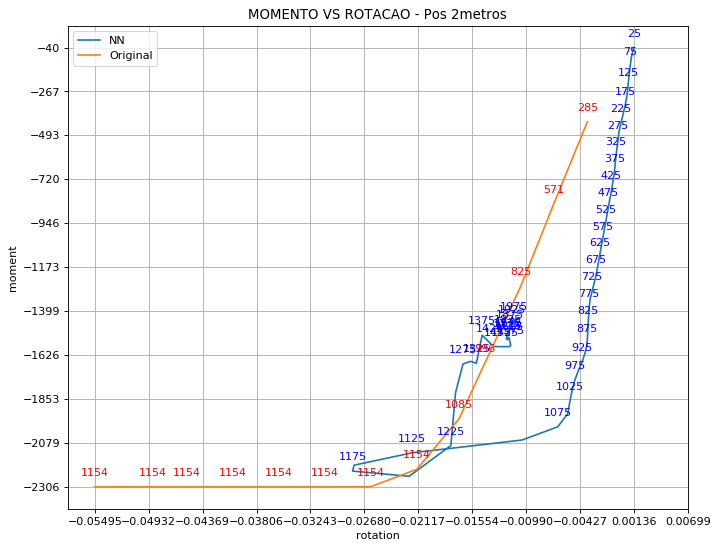

1225
-2153.5417
0.012489378
25
-41.54692
-0.0011648359



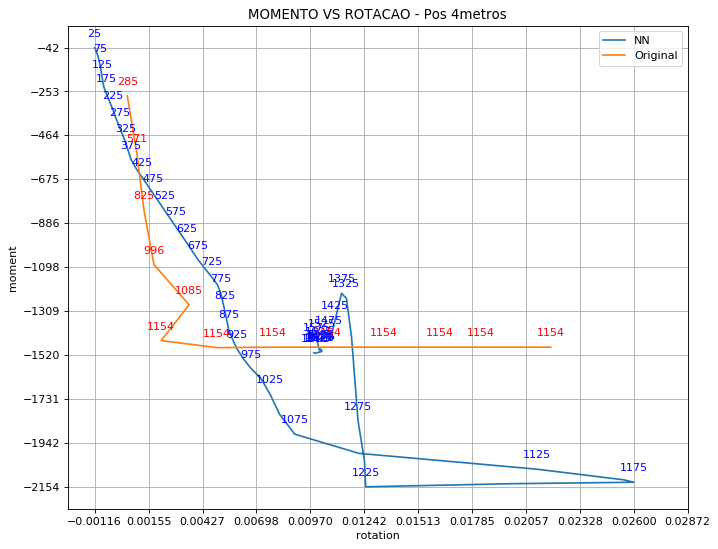

25
126.96394
-0.0008495301
1200
2713.5544
0.016641637



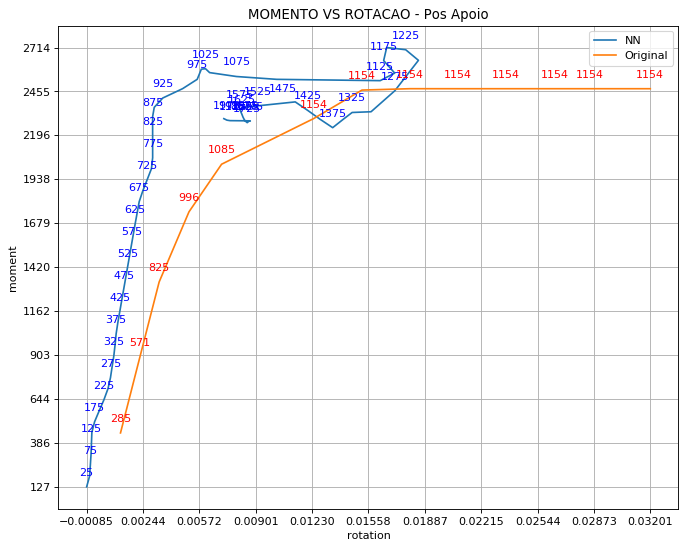

1225
-2311.7102
-0.004251415
25
-30.476696
-0.000466377



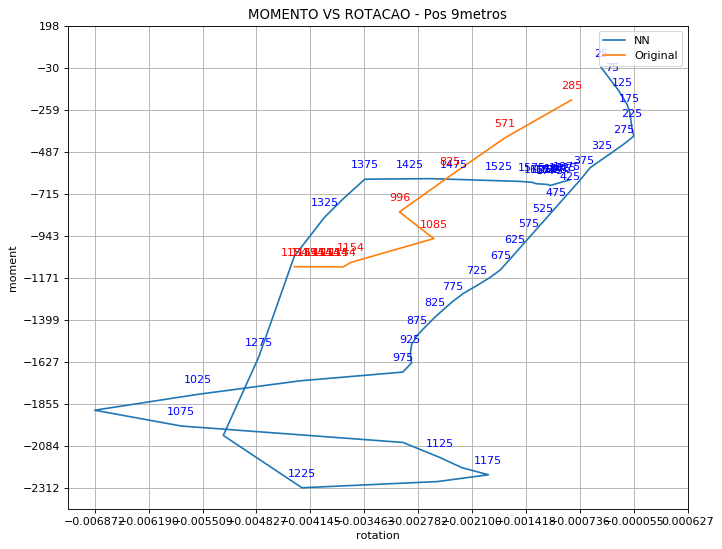

In [44]:
make_graph_solo_MxR(solo_rotacao_carga_2,solo_momento_carga_2,rotacao_carga_orig_2,momento_carga_orig_1,load2,'MOMENTO VS ROTACAO - Pos 2metros')
make_graph_solo_MxR(solo_rotacao_carga2_2,solo_momento_carga2_2,rotacao_carga2_orig_2,momento_carga2_orig_1,load2,'MOMENTO VS ROTACAO - Pos 4metros')
make_graph_solo_MxR(solo_rotacao_apoio_2,solo_momento_apoio_2,rotacao_apoio_orig_2,momento_apoio_orig_1,load2,'MOMENTO VS ROTACAO - Pos Apoio')
make_graph_solo_MxR(solo_rotacao_meiovao2_2,solo_momento_meiovao2_2,rotacao_meiovao2_orig_2,momento_meiovao2_orig_1,load2,'MOMENTO VS ROTACAO - Pos 9metros')

Alpha:1 Beta:1 X=2


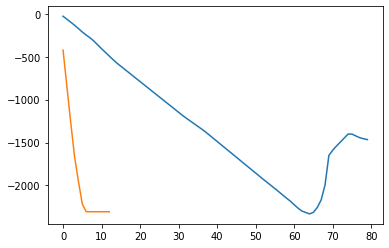

Predict: 1600 Real: 1564


In [45]:
print('Alpha:1 Beta:1 X=2')
plt.plot(solo_momento_carga_1)
plt.plot(momento_carga_orig_1)
plt.show()
print('Predict:',25*np.where(solo_momento_carga_1==min(solo_momento_carga_1))[0][0],
      'Real:',load1[np.where(momento_carga_orig_1==min(momento_carga_orig_1))[0][0]])

Alpha:1 Beta:1 X=Apoio


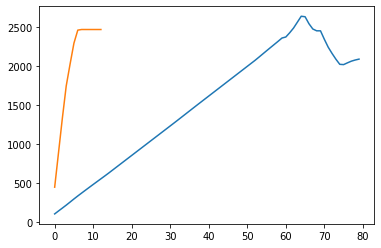

Predict: 1600 Real: 1564


In [46]:
print('Alpha:1 Beta:1 X=Apoio')
plt.plot(solo_momento_apoio_1)
plt.plot(momento_apoio_orig_1)
plt.show()
print('Predict:',25*np.where(solo_momento_apoio_1==max(solo_momento_apoio_1))[0][0],
      'Real:',load1[np.where(momento_apoio_orig_1==max(momento_apoio_orig_1))[0][0]])

Alpha:2 Beta:2 X=2


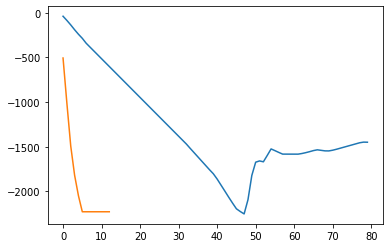

Predict: 1175 Real: 1154


In [47]:
print('Alpha:2 Beta:2 X=2')
plt.plot(solo_momento_carga_2)
plt.plot(momento_carga_orig_2)
plt.show()
print('Predict:',25*np.where(solo_momento_carga_2==min(solo_momento_carga_2))[0][0],
      'Real:',load2[np.where(momento_carga_orig_2==min(momento_carga_orig_2))[0][0]])

Alpha:2 Beta:2 X=Apoio


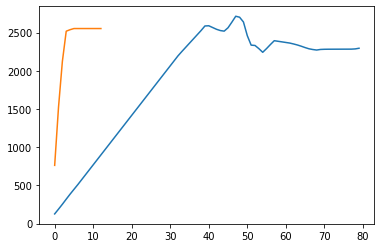

Predict: 1175 Real: 1154


In [48]:
print('Alpha:2 Beta:2 X=Apoio')
plt.plot(solo_momento_apoio_2)
plt.plot(momento_apoio_orig_2)
plt.show()
print('Predict:',25*np.where(solo_momento_apoio_2==max(solo_momento_apoio_2))[0][0],
      'Real:',load2[np.where(momento_apoio_orig_2==max(momento_apoio_orig_2))[0][0]])

In [50]:
#GET MORE REAL RESULTS


realmom =  pd.read_excel('reals.xlsx',header=None)
realrot =  pd.read_excel('reals-rot.xlsx',header=None)

realmom=realmom.dropna()
realrot=realrot.dropna()
realmom.iloc[0:17]

0    1    2       3      4       5         6            7           8   \
0   2.0  4.0  9.0   200.0  100.0   200.0  8.613530  1722.906032  861.453016   
1   2.0  4.0  9.0   250.0  125.0   250.0  7.644504  1911.376018  955.688009   
2   2.0  4.0  9.0   300.0  150.0   300.0  6.423998  1927.499364  963.749682   
4   2.0  4.0  9.0   350.0  175.0   350.0  5.506284  1927.549316  963.774658   
6   2.0  4.0  9.0   400.0  200.0   400.0  4.817998  1927.599364  963.799682   
8   2.0  4.0  9.0   450.0  225.0   450.0  4.282665  1927.649364  963.824682   
10  2.0  4.0  9.0   500.0  250.0   500.0  3.854399  1927.699364  963.849682   
12  2.0  4.0  9.0   550.0  275.0   550.0  3.503999  1927.749447  963.874724   
14  2.0  4.0  9.0   600.0  300.0   600.0  3.211999  1927.799364  963.899682   
16  2.0  4.0  9.0   650.0  325.0   650.0  2.964922  1927.849423  963.924712   
18  2.0  4.0  9.0   700.0  350.0   700.0  2.753142  1927.899316  963.949658   
20  2.0  4.0  9.0   750.0  375.0   750.0  2.569599  1927.949364  963.974682   
22  2.0  4.0  9.0   800.0  400.0   800.0  2.408999  1927.999364  963.999682   
24  2.0  4.0  9.0   850.0  425.0   850.0  2.267293  1928.049435  964.024718   
26  2.0  4.0  9.0   900.0  450.0   900.0  2.141333  1928.099364  964.049682   
28  2.0  4.0  9.0   950.0  475.0   950.0  2.028631  1928.149423  964.074712   
30  2.0  4.0  9.0  1000.0  500.0  1000.0  1.927199  1928.199364  964.099682   

             9   ...       36       37       38       39       40       41  \
0   1722.906032  ... -1503.92 -1503.92 -1253.27 -1002.61 -1002.61 -751.961   
1   1911.376018  ... -1646.86 -1646.86 -1372.38 -1097.90 -1097.90 -823.428   
2   1927.499364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
4   1927.549316  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
6   1927.599364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
8   1927.649364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
10  1927.699364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
12  1927.749447  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
14  1927.799364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
16  1927.849423  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
18  1927.899316  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
20  1927.949364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
22  1927.999364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
24  1928.049435  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
26  1928.099364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
28  1928.149423  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   
30  1928.199364  ... -1635.39 -1635.39 -1362.83 -1090.26 -1090.26 -817.696   

         42       43       44        45  
0  -501.307 -501.307 -250.654  0.000000  
1  -548.952 -548.952 -274.476 -0.000015  
2  -545.130 -545.130 -272.565  0.000000  
4  -545.130 -545.130 -272.565  0.000000  
6  -545.130 -545.130 -272.565  0.000000  
8  -545.130 -545.130 -272.565  0.000000  
10 -545.130 -545.130 -272.565  0.000000  
12 -545.130 -545.130 -272.565  0.000000  
14 -545.130 -545.130 -272.565  0.000000  
16 -545.130 -545.130 -272.565  0.000000  
18 -545.130 -545.130 -272.565  0.000000  
20 -545.130 -545.130 -272.565  0.000000  
22 -545.130 -545.130 -272.565  0.000000  
24 -545.130 -545.130 -272.565  0.000000  
26 -545.130 -545.130 -272.565  0.000000  
28 -545.130 -545.130 -272.565  0.000000  
30 -545.130 -545.130 -272.565  0.000000  

[17 rows x 46 columns]

In [51]:
rot_05_1=[]
mom_05_1=[]
load_05_1=[]

rot_1_2=[]
mom_1_2=[]
load_1_2=[]

rot_05_2=[]
mom_05_2=[]
load_05_2=[]

rot_1_05=[]
mom_1_05=[]
load_1_05=[]

rot_2_1=[]
mom_2_1=[]
load_2_1=[]

for i in range(0,17):
    mom_05_1.append(realmom.iloc[i][[10,12,15,18,21,24,27,30,33,36,39,42,45]])
    rot_05_1.append(realrot.iloc[i][[10,12,14,16,18,20,22,24,26,28,30,32,34]])
    load_05_1.append(realmom.iloc[i][7])

for i in range(17,34):
    mom_1_2.append(realmom.iloc[i][[10,12,15,18,21,24,27,30,33,36,39,42,45]])
    rot_1_2.append(realrot.iloc[i][[10,12,14,16,18,20,22,24,26,28,30,32,34]])
    load_1_2.append(realmom.iloc[i][7])
    
for i in range(34,51):
    mom_05_2.append(realmom.iloc[i][[10,12,15,18,21,24,27,30,33,36,39,42,45]])
    rot_05_2.append(realrot.iloc[i][[10,12,14,16,18,20,22,24,26,28,30,32,34]])
    load_05_2.append(realmom.iloc[i][7])
    
for i in range(51,68):
    mom_1_05.append(realmom.iloc[i][[10,12,15,18,21,24,27,30,33,36,39,42,45]])
    rot_1_05.append(realrot.iloc[i][[10,12,14,16,18,20,22,24,26,28,30,32,34]])
    load_1_05.append(realmom.iloc[i][7])
        
for i in range(68,84):
    mom_2_1.append(realmom.iloc[i][[10,12,15,18,21,24,27,30,33,36,39,42,45]])
    rot_2_1.append(realrot.iloc[i][[10,12,14,16,18,20,22,24,26,28,30,32,34]])
    load_2_1.append(realmom.iloc[i][7])
    


In [52]:

#GET NN PREDICTIONS FOR THE 3 SCENARIOS

Pos = np.zeros((120,13,1))
Pesos_05_1 = np.zeros((120,3,1))
Pesos_1_2 = np.zeros((120,3,1))
Pesos_05_2 = np.zeros((120,3,1))
Pesos_1_05 = np.zeros((120,3,1))
Pesos_2_1 = np.zeros((120,3,1))



for i in range(80):
    Pos[i,2,0] = 1
    Pos[i,4,0] = 1
    Pos[i,9,0] = 1
    
    
    Pesos_05_1[i,0,0] = 25*(i+1)*0.01
    Pesos_05_1[i,1,0] = 25*(i+1)*0.01*0.5 
    Pesos_05_1[i,2,0] = 25*(i+1)*0.01 
    
    Pesos_1_2[i,0,0] = 25*(i+1)*0.01 
    Pesos_1_2[i,1,0] = 25*(i+1)*0.01
    Pesos_1_2[i,2,0] = 25*(i+1)*0.01*2
    
    Pesos_05_2[i,0,0] = 25*(i+1)*0.01 
    Pesos_05_2[i,1,0] = 25*(i+1)*0.01*0.5 
    Pesos_05_2[i,2,0] = 25*(i+1)*0.01*2
    
    Pesos_1_05[i,0,0] = 25*(i+1)*0.01
    Pesos_1_05[i,1,0] = 25*(i+1)*0.01
    Pesos_1_05[i,2,0] = 25*(i+1)*0.01*0.5 
    
    Pesos_2_1[i,0,0] = 25*(i+1)*0.01
    Pesos_2_1[i,1,0] = 25*(i+1)*0.01*2
    Pesos_2_1[i,2,0] = 25*(i+1)*0.01
    
    
    
    
pred_mom_05_1 = MOMENT_model.predict([Pos,Pesos_05_1[:,:,0]])
pred_rot_05_1 = SK_model.predict([Pos,Pesos_05_1[:,:,0]])

pred_mom_1_2 = MOMENT_model.predict([Pos,Pesos_1_2[:,:,0]])
pred_rot_1_2 = SK_model.predict([Pos,Pesos_1_2[:,:,0]])

pred_mom_05_2 = MOMENT_model.predict([Pos,Pesos_05_2[:,:,0]])
pred_rot_05_2 = SK_model.predict([Pos,Pesos_05_2[:,:,0]])

pred_mom_1_05 = MOMENT_model.predict([Pos,Pesos_1_05[:,:,0]])
pred_rot_1_05 = SK_model.predict([Pos,Pesos_1_05[:,:,0]])

pred_mom_2_1 = MOMENT_model.predict([Pos,Pesos_2_1[:,:,0]])
pred_rot_2_1 = SK_model.predict([Pos,Pesos_2_1[:,:,0]])



In [53]:
#GET BOTH REAL RESULTS AND NN PREDICTION FOR THE MOMENT AND ROTATION IN THE ROTULA POINTS


mom_05_1_carga=[]
pred_mom_05_1_carga=[]
mom_05_1_apoio=[]
pred_mom_05_1_apoio=[]
rot_05_1_carga=[]
pred_rot_05_1_carga=[]
rot_05_1_apoio=[]
pred_rot_05_1_apoio=[]

mom_1_2_carga=[]
pred_mom_1_2_carga=[]
mom_1_2_apoio=[]
pred_mom_1_2_apoio=[]
rot_1_2_carga=[]
pred_rot_1_2_carga=[]
rot_1_2_apoio=[]
pred_rot_1_2_apoio=[]

mom_05_2_carga=[]
pred_mom_05_2_carga=[]
mom_05_2_apoio=[]
pred_mom_05_2_apoio=[]
rot_05_2_carga=[]
pred_rot_05_2_carga=[]
rot_05_2_apoio=[]
pred_rot_05_2_apoio=[]

mom_1_05_carga=[]
pred_mom_1_05_carga=[]
mom_1_05_apoio=[]
pred_mom_1_05_apoio=[]
rot_1_05_carga=[]
pred_rot_1_05_carga=[]
rot_1_05_apoio=[]
pred_rot_1_05_apoio=[]

mom_2_1_carga=[]
pred_mom_2_1_carga=[]
mom_2_1_apoio=[]
pred_mom_2_1_apoio=[]
rot_2_1_carga=[]
pred_rot_2_1_carga=[]
rot_2_1_apoio=[]
pred_rot_2_1_apoio=[]



for i in range(0,17):
   
    mom_05_1_carga.append(mom_05_1[i][15])
    rot_05_1_carga.append(rot_05_1[i][14])
    mom_05_1_apoio.append(mom_05_1[i][27])
    rot_05_1_apoio.append(rot_05_1[i][22])
    
    
    mom_1_2_carga.append(mom_05_1[i][36])
    rot_1_2_carga.append(rot_05_1[i][28])    
    mom_1_2_apoio.append(mom_05_1[i][27])    
    rot_1_2_apoio.append(rot_05_1[i][22])
   

    mom_05_2_carga.append(mom_05_1[i][36])   
    rot_05_2_carga.append(rot_05_1[i][28])    
    mom_05_2_apoio.append(mom_05_1[i][27])    
    rot_05_2_apoio.append(rot_05_1[i][22])    
    
    
    mom_1_05_carga.append(mom_05_1[i][15])
    rot_1_05_carga.append(rot_05_1[i][14])    
    mom_1_05_apoio.append(mom_05_1[i][27])    
    rot_1_05_apoio.append(rot_05_1[i][22])
        
    
    mom_2_1_carga.append(mom_05_1[i][15])    
    rot_2_1_carga.append(rot_05_1[i][14])    
    mom_2_1_apoio.append(mom_05_1[i][27])    
    rot_2_1_apoio.append(rot_05_1[i][22])
   
    
    
    

for i in range(120):
    pred_mom_05_1_carga.append(pred_mom_05_1[i][2])
    pred_rot_05_1_carga.append(pred_rot_05_1[i][2])
    pred_mom_05_1_apoio.append(pred_mom_05_1[i][6])
    pred_rot_05_1_apoio.append(pred_rot_05_1[i][6])
    
    
    pred_mom_1_2_carga.append(pred_mom_1_2[i][2])
    pred_rot_1_2_carga.append(pred_rot_1_2[i][2])
    pred_mom_1_2_apoio.append(pred_mom_1_2[i][6])
    pred_rot_1_2_apoio.append(pred_rot_1_2[i][6])
    
    
    pred_mom_05_2_carga.append(pred_mom_05_2[i][9])
    pred_rot_05_2_carga.append(pred_rot_05_2[i][9])
    pred_mom_05_2_apoio.append(pred_mom_05_2[i][6])
    pred_rot_05_2_apoio.append(pred_rot_05_2[i][6])
    
    pred_mom_1_05_carga.append(pred_mom_1_05[i][2])
    pred_rot_1_05_carga.append(pred_rot_1_05[i][2])
    pred_mom_1_05_apoio.append(pred_mom_1_05[i][6])
    pred_rot_1_05_apoio.append(pred_rot_1_05[i][6])
    
    pred_mom_2_1_carga.append(pred_mom_2_1[i][2])
    pred_rot_2_1_carga.append(pred_rot_2_1[i][2])
    pred_mom_2_1_apoio.append(pred_mom_2_1[i][6])
    pred_rot_2_1_apoio.append(pred_rot_2_1[i][6])

2000
-2354.05
-0.016259594
2400
-13.990394
0.0012795515



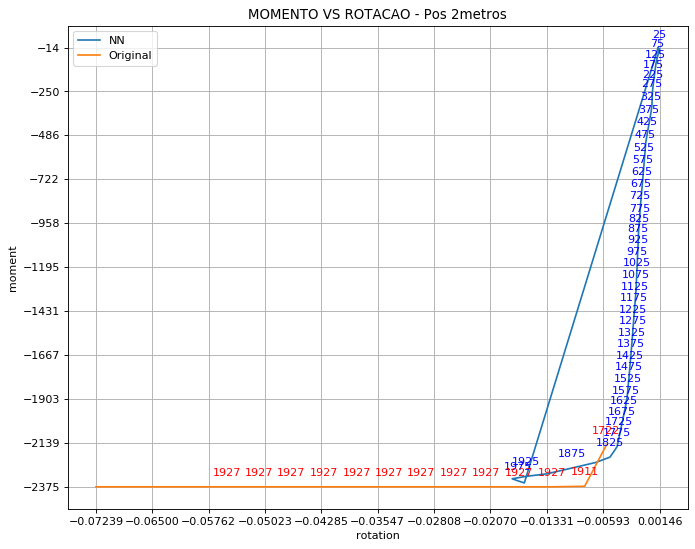

In [54]:
make_graph_solo_MxR(pred_rot_05_1_carga,pred_mom_05_1_carga,rot_05_1_carga,mom_05_1_carga,load_05_1,'MOMENTO VS ROTACAO - Pos 2metros')

2375
3.2787757
-0.0007485971
2000
2691.604
0.004248064



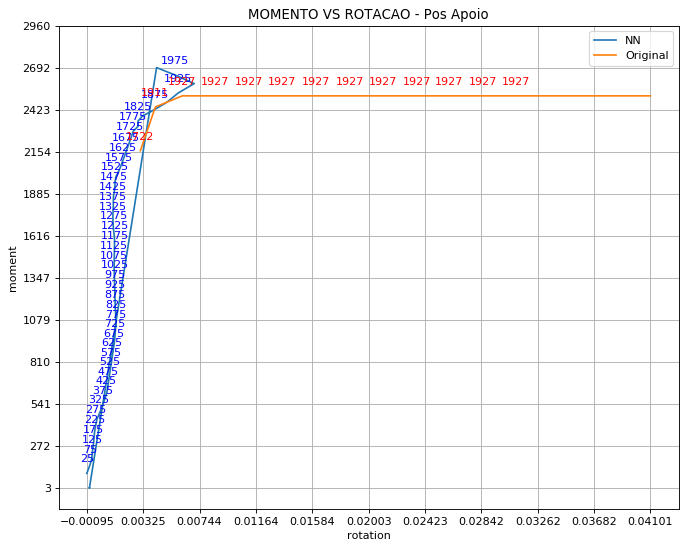

In [55]:
make_graph_solo_MxR(pred_rot_05_1_apoio,pred_mom_05_1_apoio,rot_05_1_apoio,mom_05_1_apoio,load_05_1,'MOMENTO VS ROTACAO - Pos Apoio')

1650
-2053.1855
-0.0065917354
2400
-13.990394
0.0012795515



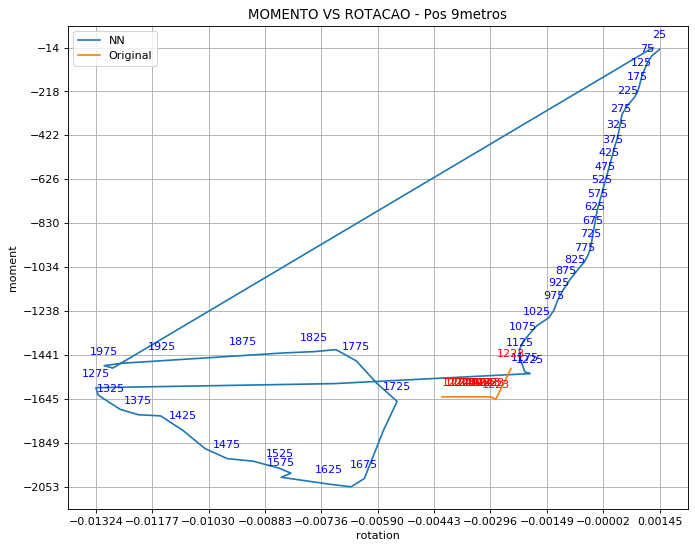

In [56]:
make_graph_solo_MxR(pred_rot_1_2_carga,pred_mom_1_2_carga,rot_1_2_carga,mom_1_2_carga,load_1_2,'MOMENTO VS ROTACAO - Pos 9metros')

2375
3.2787757
-0.0007485971
1550
2651.0854
0.004197577



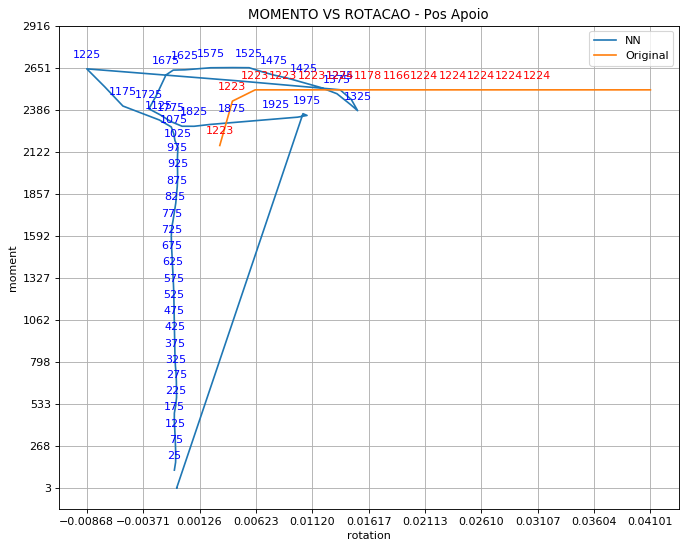

In [57]:
make_graph_solo_MxR(pred_rot_1_2_apoio,pred_mom_1_2_apoio,rot_1_2_apoio,mom_1_2_apoio,load_1_2,'MOMENTO VS ROTACAO - Pos Apoio')

1200
-2396.5144
-0.017226944
2375
21.96059
-0.00048638275



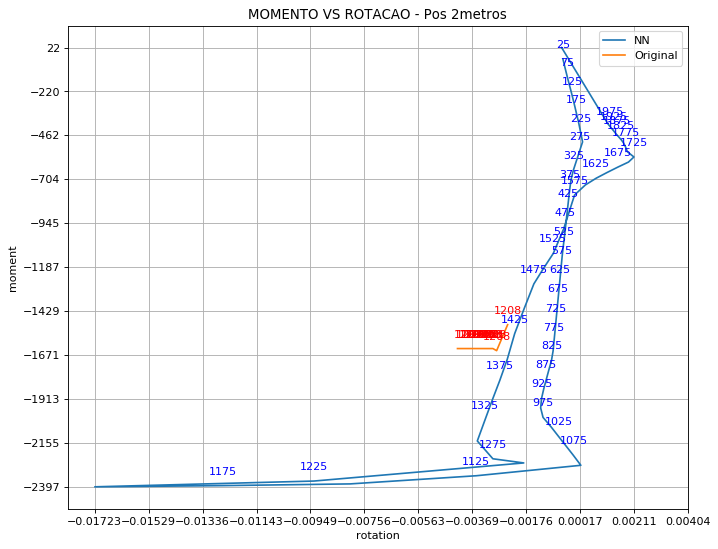

In [58]:
make_graph_solo_MxR(pred_rot_05_2_carga,pred_mom_05_2_carga,rot_05_2_carga,mom_05_2_carga,load_05_2,'MOMENTO VS ROTACAO - Pos 2metros')

2375
3.2787757
-0.0007485971
2000
2700.8228
0.003101416



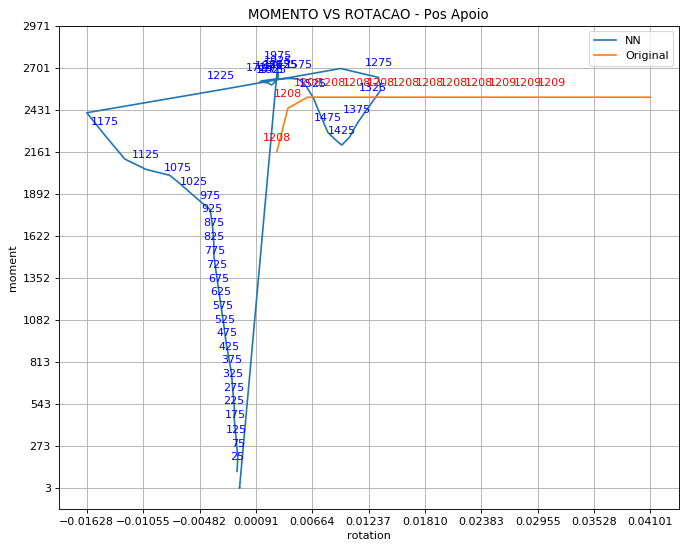

In [59]:
make_graph_solo_MxR(pred_rot_05_2_apoio,pred_mom_05_2_apoio,rot_05_2_apoio,mom_05_2_apoio,load_05_2,'MOMENTO VS ROTACAO - Pos Apoio')

1600
-2306.8726
-0.03236288
2400
-13.990394
0.0012795515



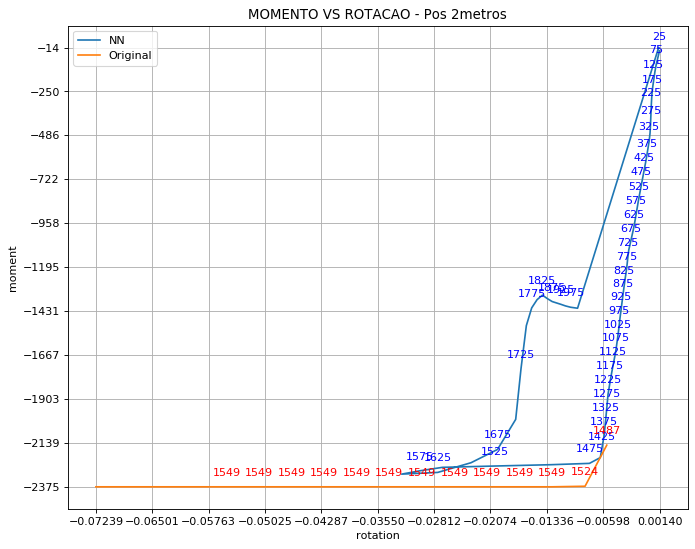

In [60]:
make_graph_solo_MxR(pred_rot_1_05_carga,pred_mom_1_05_carga,rot_1_05_carga,mom_1_05_carga,load_1_05,'MOMENTO VS ROTACAO - Pos 2metros')

2375
3.2787757
-0.0007485971
1625
2536.3872
0.018709248



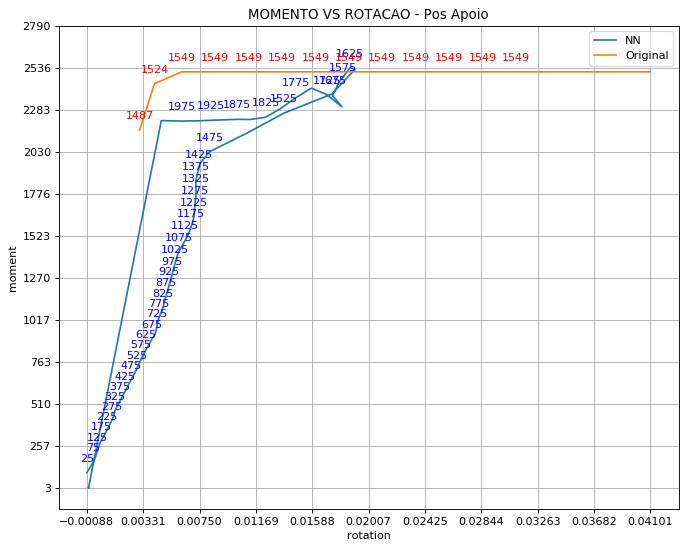

In [61]:
make_graph_solo_MxR(pred_rot_1_05_apoio,pred_mom_1_05_apoio,rot_1_05_apoio,mom_1_05_apoio,load_1_05,'MOMENTO VS ROTACAO - Pos Apoio')

1200
-2288.6436
-0.034314536
2400
-13.990394
0.0012795515



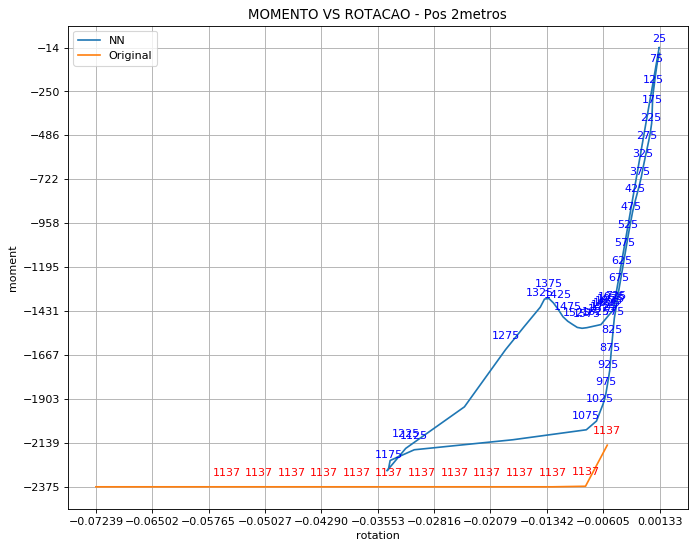

In [62]:
make_graph_solo_MxR(pred_rot_2_1_carga,pred_mom_2_1_carga,rot_2_1_carga,mom_2_1_carga,load_2_1,'MOMENTO VS ROTACAO - Pos 2metros')

2375
3.2787757
-0.0007485971
1200
2602.567
0.022133686



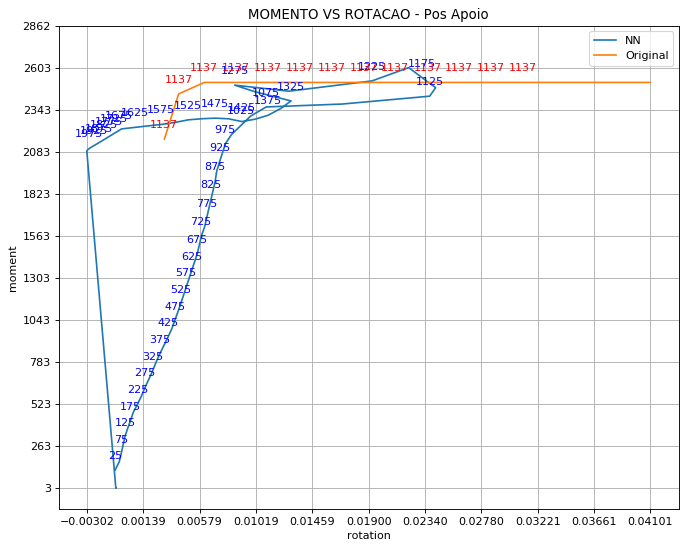

In [63]:
make_graph_solo_MxR(pred_rot_2_1_apoio,pred_mom_2_1_apoio,rot_2_1_apoio,mom_2_1_apoio,load_2_1,'MOMENTO VS ROTACAO - Pos Apoio')